In [96]:
#pip install wordcloud

In [97]:
#from wordcloud import WordCloud
#from wordcloud import ImageColorGenerator
#from wordcloud import STOPWORDS
#import matplotlib.pyplot as plt
#import pandas as pd

In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import statsmodels.api as sm
import scipy.stats as scistat
#import sklearn as sk

from scipy.stats import chi2_contingency
import xlsxwriter

In [99]:
def append_df_to_excel(filename, df, sheet_name='Sheet1', startrow=None,
                       truncate_sheet=False, 
                       **to_excel_kwargs):
    """
    Append a DataFrame [df] to existing Excel file [filename]
    into [sheet_name] Sheet.
    If [filename] doesn't exist, then this function will create it.

    Parameters:
      filename : File path or existing ExcelWriter
                 (Example: '/path/to/file.xlsx')
      df : dataframe to save to workbook
      sheet_name : Name of sheet which will contain DataFrame.
                   (default: 'Sheet1')
      startrow : upper left cell row to dump data frame.
                 Per default (startrow=None) calculate the last row
                 in the existing DF and write to the next row...
      truncate_sheet : truncate (remove and recreate) [sheet_name]
                       before writing DataFrame to Excel file
      to_excel_kwargs : arguments which will be passed to `DataFrame.to_excel()`
                        [can be dictionary]

    Returns: None
    """
    from openpyxl import load_workbook

    import pandas as pd

    # ignore [engine] parameter if it was passed
    if 'engine' in to_excel_kwargs:
        to_excel_kwargs.pop('engine')

    writer = pd.ExcelWriter(filename, engine='openpyxl')

    # Python 2.x: define [FileNotFoundError] exception if it doesn't exist 
    try:
        FileNotFoundError
    except NameError:
        FileNotFoundError = IOError


    try:
        # try to open an existing workbook
        writer.book = load_workbook(filename)

        # get the last row in the existing Excel sheet
        # if it was not specified explicitly
        if startrow is None and sheet_name in writer.book.sheetnames:
            startrow = writer.book[sheet_name].max_row

        # truncate sheet
        if truncate_sheet and sheet_name in writer.book.sheetnames:
            # index of [sheet_name] sheet
            idx = writer.book.sheetnames.index(sheet_name)
            # remove [sheet_name]
            writer.book.remove(writer.book.worksheets[idx])
            # create an empty sheet [sheet_name] using old index
            writer.book.create_sheet(sheet_name, idx)

        # copy existing sheets
        writer.sheets = {ws.title:ws for ws in writer.book.worksheets}
    except FileNotFoundError:
        # file does not exist yet, we will create it
        pass

    if startrow is None:
        startrow = 0

    # write out the new sheet
    df.to_excel(writer, sheet_name, startrow=startrow, **to_excel_kwargs)

    # save the workbook
    writer.save()

In [100]:
missing_values = ["n/a", "na", "--", ""]

df = pd.read_excel("Sondage_sur_l'attitude_adoptée20220123.xlsx", na_values = missing_values)

# Dataset is now stored in a Pandas Dataframe	
df.head(15)

,#,Submission Date,i- Saisissez l'âge de la personne,ii- Saisissez le Genre de la personne,"ii.1- Si autre Genre, précisez-le",iii- Saisissez le statut matrimonial de la personne,iiii- Saisissez le niveau d’étude de la personne,"iiii.1- Si autre niveau d'étude, précisez-le",iiiii- Saisissez le Département,iiiiii- Saisissez la Commune,Location Coordinates,iiiiii- Saisissezla profession de la personne,vii- Saisissez la religion de la personne,"Viii.1- Si autre religion, précisez-la",A- Depuis quand avez-vous consulté un médecin,B- Avez-vous l’habitude de vous faire vacciner quand vous étiez plus jeune ?,"C- Si oui, y avait-il des effets secondaires ?",D- Quelle était votre réaction à la suite des effets secondaires ?,"D.1- Si autres réactions, Préciser",1- Connaissez-vous les différents types de vaccin anti-COVID existant en Haïti ?,"2- Sioui, lesquels :",3- Aviez-vous déjà été vacciné de l'un des vaccins suscités ?,"3.1-Si oui, pourquoi êtes-vous fait vacciner ?","3.1.1- Si autres raisons, précisez-les","3.2- Si oui, avez-vous ressenti des effets secondaires du vaccin injecté ?",4- Avez-vous déjà sensibilisé vos proches sur l’importance de se faire vacciner,"4.1– Si oui, combien de proches",4.2-Avez-vous un proche qui a déjà pris l’un des vaccins suscités ?,"4.2.2-Si oui, vous a-t-elle reporté des effets secondaires du vaccin injecté ?",5- Sioui quels types d’effets secondaires ?,"5.1- Si autres types d’effets secondaires, précisez-les",6- Avez-vous déjà été sensibilisé sur l’importance de se faire vacciner ?,"7- Si oui, par quels moyens ?",7.1 - Les gens obtiennent leurs informations à travers de multiples sources. Dites-nous quels effets ces sources d'informations ont-elles sur votre comportement ou opinion vis-à-vis du vaccin COVD-19 >> Organismes gouvernementaux,"7.1 - Les gens obtiennent leurs informations à travers de multiples sources. Dites-nous quels effets ces sources d'informations ont-elles sur votre comportement ou opinion vis-à-vis du vaccin COVD-19 >> Réseaux sociaux (facebook, instagram, whatsapp, twitter)",7.1 - Les gens obtiennent leurs informations à travers de multiples sources. Dites-nous quels effets ces sources d'informations ont-elles sur votre comportement ou opinion vis-à-vis du vaccin COVD-19 >> Discussion entre amis/famille,7.1 - Les gens obtiennent leurs informations à travers de multiples sources. Dites-nous quels effets ces sources d'informations ont-elles sur votre comportement ou opinion vis-à-vis du vaccin COVD-19 >> Fournisseur de soins de santé,"7.2- Si autres moyens, précisez-les",8- Voulez-vousprendre le vaccin anti COVID-19 ?,"8.1- Si oui, pourquoi voulez-vous faire vacciner ?","8.1.1- Si autres raisons, précisez-les","8.2-Si non, pourquoi vous ne voulez pas prendre le vaccin ?",8.2.a- Saisissez vos préoccupations de ne pas prendre le vaccinsur une échelle de 1 à 5 >> Le vaccin ne m'est pas facilement accessible,8.2.a- Saisissez vos préoccupations de ne pas prendre le vaccinsur une échelle de 1 à 5 >> Le vaccin peut être défectueux ou faux,8.2.a- Saisissez vos préoccupations de ne pas prendre le vaccinsur une échelle de 1 à 5 >> Le vaccin a été développé trop rapidement,8.2.a- Saisissez vos préoccupations de ne pas prendre le vaccinsur une échelle de 1 à 5 >> Il pourrait y avoir des effets secondaires qui sont actuellement inconnus,8.2.a- Saisissez vos préoccupations de ne pas prendre le vaccinsur une échelle de 1 à 5 >> Le vaccin est promu pour un gain monétaire,"8.2.1- S'il y a autres raisons de ne pas prendre le vaccin anti-COVID-19, précisez-les","8.2.2- Si non, quelle autre alternative envisageriez-vous de prendre afin de lutter contre le COVID-19",Commentaires,Date,Signature,Submission IP
0,1,2021/12/23 14:35:03,18 – 25 ans,2- Masculin,NaN,4- Union libre,2- Universitaire,NaN,OUEST,Port_au_Prince,Longitude: -72.320541\nLatitude: 18.5373993,Gestion en economie,1- Catholique,NaN,A- Moins de 6 mois,1- OUI,2- NON,5- Non applicable (N/A),NaN,2- NON,NaN,2- NON,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [101]:
pd.set_option("display.max_columns", None)
df.head(3)

,#,Submission Date,i- Saisissez l'âge de la personne,ii- Saisissez le Genre de la personne,"ii.1- Si autre Genre, précisez-le",iii- Saisissez le statut matrimonial de la personne,iiii- Saisissez le niveau d’étude de la personne,"iiii.1- Si autre niveau d'étude, précisez-le",iiiii- Saisissez le Département,iiiiii- Saisissez la Commune,Location Coordinates,iiiiii- Saisissezla profession de la personne,vii- Saisissez la religion de la personne,"Viii.1- Si autre religion, précisez-la",A- Depuis quand avez-vous consulté un médecin,B- Avez-vous l’habitude de vous faire vacciner quand vous étiez plus jeune ?,"C- Si oui, y avait-il des effets secondaires ?",D- Quelle était votre réaction à la suite des effets secondaires ?,"D.1- Si autres réactions, Préciser",1- Connaissez-vous les différents types de vaccin anti-COVID existant en Haïti ?,"2- Sioui, lesquels :",3- Aviez-vous déjà été vacciné de l'un des vaccins suscités ?,"3.1-Si oui, pourquoi êtes-vous fait vacciner ?","3.1.1- Si autres raisons, précisez-les","3.2- Si oui, avez-vous ressenti des effets secondaires du vaccin injecté ?",4- Avez-vous déjà sensibilisé vos proches sur l’importance de se faire vacciner,"4.1– Si oui, combien de proches",4.2-Avez-vous un proche qui a déjà pris l’un des vaccins suscités ?,"4.2.2-Si oui, vous a-t-elle reporté des effets secondaires du vaccin injecté ?",5- Sioui quels types d’effets secondaires ?,"5.1- Si autres types d’effets secondaires, précisez-les",6- Avez-vous déjà été sensibilisé sur l’importance de se faire vacciner ?,"7- Si oui, par quels moyens ?",7.1 - Les gens obtiennent leurs informations à travers de multiples sources. Dites-nous quels effets ces sources d'informations ont-elles sur votre comportement ou opinion vis-à-vis du vaccin COVD-19 >> Organismes gouvernementaux,"7.1 - Les gens obtiennent leurs informations à travers de multiples sources. Dites-nous quels effets ces sources d'informations ont-elles sur votre comportement ou opinion vis-à-vis du vaccin COVD-19 >> Réseaux sociaux (facebook, instagram, whatsapp, twitter)",7.1 - Les gens obtiennent leurs informations à travers de multiples sources. Dites-nous quels effets ces sources d'informations ont-elles sur votre comportement ou opinion vis-à-vis du vaccin COVD-19 >> Discussion entre amis/famille,7.1 - Les gens obtiennent leurs informations à travers de multiples sources. Dites-nous quels effets ces sources d'informations ont-elles sur votre comportement ou opinion vis-à-vis du vaccin COVD-19 >> Fournisseur de soins de santé,"7.2- Si autres moyens, précisez-les",8- Voulez-vousprendre le vaccin anti COVID-19 ?,"8.1- Si oui, pourquoi voulez-vous faire vacciner ?","8.1.1- Si autres raisons, précisez-les","8.2-Si non, pourquoi vous ne voulez pas prendre le vaccin ?",8.2.a- Saisissez vos préoccupations de ne pas prendre le vaccinsur une échelle de 1 à 5 >> Le vaccin ne m'est pas facilement accessible,8.2.a- Saisissez vos préoccupations de ne pas prendre le vaccinsur une échelle de 1 à 5 >> Le vaccin peut être défectueux ou faux,8.2.a- Saisissez vos préoccupations de ne pas prendre le vaccinsur une échelle de 1 à 5 >> Le vaccin a été développé trop rapidement,8.2.a- Saisissez vos préoccupations de ne pas prendre le vaccinsur une échelle de 1 à 5 >> Il pourrait y avoir des effets secondaires qui sont actuellement inconnus,8.2.a- Saisissez vos préoccupations de ne pas prendre le vaccinsur une échelle de 1 à 5 >> Le vaccin est promu pour un gain monétaire,"8.2.1- S'il y a autres raisons de ne pas prendre le vaccin anti-COVID-19, précisez-les","8.2.2- Si non, quelle autre alternative envisageriez-vous de prendre afin de lutter contre le COVID-19",Commentaires,Date,Signature,Submission IP
0,1,2021/12/23 14:35:03,18 – 25 ans,2- Masculin,NaN,4- Union libre,2- Universitaire,NaN,OUEST,Port_au_Prince,Longitude: -72.320541\nLatitude: 18.5373993,Gestion en economie,1- Catholique,NaN,A- Moins de 6 mois,1- OUI,2- NON,5- Non applicable (N/A),NaN,2- NON,NaN,2- NON,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [102]:
df["i- Saisissez l'âge de la personne"].value_counts()

18 – 25 ans       356
26 - 30 ans       148
31 - 35 ans        78
36 - 40 ans        57
30 - 35 ans        40
51 ans et +…….     35
41 - 45 ans        29
25 - 30 ans        29
35 - 40 ans        24
46 - 50 ans        16
40 - 45 ans        15
50 ans et +…….      6
45 - 50 ans         4
ND                  1
Name: i- Saisissez l'âge de la personne, dtype: int64

In [103]:
df["ii- Saisissez le Genre de la personne"].value_counts()

1- Féminin     423
2- Masculin    409
3- LGBTQA+       6
ND               1
Name: ii- Saisissez le Genre de la personne, dtype: int64

Submission 
Date	
i- Saisissez l'âge de la personne	
ii- Saisissez le Genre de la personne	
ii.1- Si autre Genre, précisez-le	
iii- Saisissez le statut matrimonial de la personne	
iiii- Saisissez le niveau d’étude de la personne	
iiii.1- Si autre niveau d'étude, précisez-le	
iiiii- Saisissez le Département	
iiiiii- Saisissez la Commune	
Location Coordinates	
iiiiii- Saisissezla profession de la personne	
vii- Saisissez la religion de la personne	
Viii.1- Si autre religion, précisez-la	
A- Depuis quand avez-vous consulté un médecin	
B- Avez-vous l’habitude de vous faire vacciner quand vous étiez plus jeune ?	
C- Si oui, y avait-il des effets secondaires ?	
D- Quelle était votre réaction à la suite des effets secondaires ?	
D.1- Si autres réactions, Préciser	
1- Connaissez-vous les différents types de vaccin anti-COVID existant en Haïti ?	
2- Sioui, lesquels :	
3- Aviez-vous déjà été vacciné de l'un des vaccins suscités ?	
3.1-Si oui, pourquoi êtes-vous fait vacciner ?	
3.1.1- Si autres raisons, précisez-les	
3.2- Si oui, avez-vous ressenti des effets secondaires du vaccin injecté ?	
4- Avez-vous déjà sensibilisé vos proches sur l’importance de se faire vacciner	
4.1– Si oui, combien de proches	
4.2-Avez-vous un proche qui a déjà pris l’un des vaccins suscités ?	
4.2.2-Si oui, vous a-t-elle reporté des effets secondaires du vaccin injecté ?	
5- Sioui quels types d’effets secondaires ?	
5.1- Si autres types d’effets secondaires, précisez-les	
6- Avez-vous déjà été sensibilisé sur l’importance de se faire vacciner ?	
7- Si oui, par quels moyens ?	
7.1 - Les gens obtiennent leurs informations à travers de multiples sources. Dites-nous quels effets ces sources d'informations ont-elles sur votre comportement ou opinion vis-à-vis du vaccin COVD-19 >> Organismes gouvernementaux	
7.1 - Les gens obtiennent leurs informations à travers de multiples sources. Dites-nous quels effets ces sources d'informations ont-elles sur votre comportement ou opinion vis-à-vis du vaccin COVD-19 >> Réseaux sociaux (facebook, instagram, whatsapp, twitter)	
7.1 - Les gens obtiennent leurs informations à travers de multiples sources. Dites-nous quels effets ces sources d'informations ont-elles sur votre comportement ou opinion vis-à-vis du vaccin COVD-19 >> Discussion entre amis/famille	
7.1 - Les gens obtiennent leurs informations à travers de multiples sources. Dites-nous quels effets ces sources d'informations ont-elles sur votre comportement ou opinion vis-à-vis du vaccin COVD-19 >> Fournisseur de soins de santé	
7.2- Si autres moyens, précisez-les	
8- Voulez-vousprendre le vaccin anti COVID-19 ?	
8.1- Si oui, pourquoi voulez-vous faire vacciner ?	
8.1.1- Si autres raisons, précisez-les	
8.2-Si non, pourquoi vous ne voulez pas prendre le vaccin ?	
8.2.a- Saisissez vos préoccupations de ne pas prendre le vaccinsur une échelle de 1 à 5 >> Le vaccin ne m'est pas facilement accessible
8.2.a- Saisissez vos préoccupations de ne pas prendre le vaccinsur une échelle de 1 à 5 >> Le vaccin peut être défectueux ou faux	
8.2.a- Saisissez vos préoccupations de ne pas prendre le vaccinsur une échelle de 1 à 5 >> Le vaccin a été développé trop rapidement	
8.2.a- Saisissez vos préoccupations de ne pas prendre le vaccinsur une échelle de 1 à 5 >> Il pourrait y avoir des effets secondaires qui sont actuellement inconnus	
8.2.a- Saisissez vos préoccupations de ne pas prendre le vaccinsur une échelle de 1 à 5 >> Le vaccin est promu pour un gain monétaire	
8.2.1- S'il y a autres raisons de ne pas prendre le vaccin anti-COVID-19, précisez-les	
8.2.2- Si non, quelle autre alternative envisageriez-vous de prendre afin de lutter contre le COVID-19	
Commentaires	
Date	
Signature	
Submission IP  

In [80]:
dictionary = {"Submission Date": "Submission_Date",	
            "i- Saisissez l'âge de la personne": "Age",
            "ii- Saisissez le Genre de la personne": "Genre",	
            "ii.1- Si autre Genre, précisez-le": "Genre_Autre",	
            "iii- Saisissez le statut matrimonial de la personne": "Statut_Matrimonial",
            "iiii- Saisissez le niveau d’étude de la personne":"Niveau",	
            "iiii.1- Si autre niveau d'étude, précisez-le":"Niveau_Autre",	
            "iiiii- Saisissez le Département":"Departement",	
            "iiiiii- Saisissez la Commune":"Commune",	
            "Location Coordinates":"Location",	
            "iiiiii- Saisissezla profession de la personne" : "Profession",	
            "vii- Saisissez la religion de la personne":"Religion",	
            "Viii.1- Si autre religion, précisez-la":"Religion_Autre",	
            "A- Depuis quand avez-vous consulté un médecin":"Derniere_Consultation",	
            "B- Avez-vous l’habitude de vous faire vacciner quand vous étiez plus jeune ?":"Habitude_Vaccination",	
            "C- Si oui, y avait-il des effets secondaires ?":"Habitude_Vaccination_Effets_Secondaires",	
            "D- Quelle était votre réaction à la suite des effets secondaires ?":"Reaction_Effets_Secondaires",	
            "D.1- Si autres réactions, Préciser":"Reaction_Effets_Secondaires_Autres",
            "1- Connaissez-vous les différents types de vaccin anti-COVID existant en Haïti ?":"Connaissance_Vaccins",	
            "2- Sioui, lesquels :":"Connaissance_Vaccins_Lesquels",
            "3- Aviez-vous déjà été vacciné de l'un des vaccins suscités ?":"Deja_Ete_Vaccine",	
            "3.1-Si oui, pourquoi êtes-vous fait vacciner ?":"Deja_Ete_Vaccine_Pourquoi",	
            "3.1.1- Si autres raisons, précisez-les":"Deja_Ete_Vaccine_Pourquoi_Autre",	
            "3.2- Si oui, avez-vous ressenti des effets secondaires du vaccin injecté ?":"Deja_Ete_Vaccine_Effets_Secondaires",	
            "4- Avez-vous déjà sensibilisé vos proches sur l’importance de se faire vacciner":"Sensibilisation_Proches",	
            "4.1– Si oui, combien de proches":"Sensibilisation_Proches_Combien",	
            "4.2-Avez-vous un proche qui a déjà pris l’un des vaccins suscités ?":"Proches_Vaccines",	
            "4.2.2-Si oui, vous a-t-elle reporté des effets secondaires du vaccin injecté ?":"Proches_Vaccines_Effets_Secondaires",	
            "5- Sioui quels types d’effets secondaires ?":"Proches_Vaccines_Effets_Secondaires_Types",	
            "5.1- Si autres types d’effets secondaires, précisez-les":"Proches_Vaccines_Effets_Secondaires_Types_Autre",	
            "6- Avez-vous déjà été sensibilisé sur l’importance de se faire vacciner ?":"Sensibilisation_Se_Faire_Vacc",
            "7- Si oui, par quels moyens ?": "Sensibilisation_Se_Faire_Vacc_Comment",	
            "7.1 - Les gens obtiennent leurs informations à travers de multiples sources. Dites-nous quels effets ces sources d'informations ont-elles sur votre comportement ou opinion vis-à-vis du vaccin COVD-19 >> Organismes gouvernementaux" : "Source_Info_Effets_Org_Gouv",	
            "7.1 - Les gens obtiennent leurs informations à travers de multiples sources. Dites-nous quels effets ces sources d'informations ont-elles sur votre comportement ou opinion vis-à-vis du vaccin COVD-19 >> Réseaux sociaux (facebook, instagram, whatsapp, twitter)":"Source_Info_Effets_Reseaux_Sociaux",	
            "7.1 - Les gens obtiennent leurs informations à travers de multiples sources. Dites-nous quels effets ces sources d'informations ont-elles sur votre comportement ou opinion vis-à-vis du vaccin COVD-19 >> Discussion entre amis/famille":"Source_Info_Effets_Disc_Amis_Famille",	
            "7.1 - Les gens obtiennent leurs informations à travers de multiples sources. Dites-nous quels effets ces sources d'informations ont-elles sur votre comportement ou opinion vis-à-vis du vaccin COVD-19 >> Fournisseur de soins de santé":"Source_Info_Effets_Fourn_Soins_Sante",	
            "7.2- Si autres moyens, précisez-les":"Source_Info_Effets_Autre",
            "8- Voulez-vousprendre le vaccin anti COVID-19 ?":"Veux_Prendre_Vacc_COVID19",	
            "8.1- Si oui, pourquoi voulez-vous faire vacciner ?":"Veux_Prendre_Vacc_COVID19_Pourquoi",	
            "8.1.1- Si autres raisons, précisez-les":"Veux_Prendre_Vacc_COVID19_Pourquoi_Autre",	
            "8.2-Si non, pourquoi vous ne voulez pas prendre le vaccin ?": "Veux_Pas_Prendre_Vacc_COVID19_Pourquoi",	
            "8.2.a- Saisissez vos préoccupations de ne pas prendre le vaccinsur une échelle de 1 à 5 >> Le vaccin ne m'est pas facilement accessible":"Preoccupation_Vaccin_Non_Accessible",
            "8.2.a- Saisissez vos préoccupations de ne pas prendre le vaccinsur une échelle de 1 à 5 >> Le vaccin peut être défectueux ou faux"	: "Preoccupation_Vaccin_Defectueux",
            "8.2.a- Saisissez vos préoccupations de ne pas prendre le vaccinsur une échelle de 1 à 5 >> Le vaccin a été développé trop rapidement": "Preoccupation_Vaccin_Develpper_Trop_Rapide",	
            "8.2.a- Saisissez vos préoccupations de ne pas prendre le vaccinsur une échelle de 1 à 5 >> Il pourrait y avoir des effets secondaires qui sont actuellement inconnus":"Preoccupation_Vaccin_Effets_Second_Inconnus",
            "8.2.a- Saisissez vos préoccupations de ne pas prendre le vaccinsur une échelle de 1 à 5 >> Le vaccin est promu pour un gain monétaire"	:"Preoccupation_Vaccin_Gain_Monetaire",
            "8.2.1- S'il y a autres raisons de ne pas prendre le vaccin anti-COVID-19, précisez-les":"Preoccupation_Vaccin_Autres",	
            "8.2.2- Si non, quelle autre alternative envisageriez-vous de prendre afin de lutter contre le COVID-19":"Aternative_Lutte_anti_COVID19"}

In [81]:
df= df.rename(columns = dictionary)

###Data Cleaning

In [82]:
df.head(5)

,#,Submission_Date,Age,Genre,Genre_Autre,Statut_Matrimonial,Niveau,Niveau_Autre,Departement,Commune,Location,Profession,Religion,Religion_Autre,Derniere_Consultation,Habitude_Vaccination,Habitude_Vaccination_Effets_Secondaires,Reaction_Effets_Secondaires,Reaction_Effets_Secondaires_Autres,Connaissance_Vaccins,Connaissance_Vaccins_Lesquels,Deja_Ete_Vaccine,Deja_Ete_Vaccine_Pourquoi,Deja_Ete_Vaccine_Pourquoi_Autre,Deja_Ete_Vaccine_Effets_Secondaires,Sensibilisation_Proches,Sensibilisation_Proches_Combien,Proches_Vaccines,Proches_Vaccines_Effets_Secondaires,Proches_Vaccines_Effets_Secondaires_Types,Proches_Vaccines_Effets_Secondaires_Types_Autre,Sensibilisation_Se_Faire_Vacc,Sensibilisation_Se_Faire_Vacc_Comment,Source_Info_Effets_Org_Gouv,Source_Info_Effets_Reseaux_Sociaux,Source_Info_Effets_Disc_Amis_Famille,Source_Info_Effets_Fourn_Soins_Sante,Source_Info_Effets_Autre,Veux_Prendre_Vacc_COVID19,Veux_Prendre_Vacc_COVID19_Pourquoi,Veux_Prendre_Vacc_COVID19_Pourquoi_Autre,Veux_Pas_Prendre_Vacc_COVID19_Pourquoi,Preoccupation_Vaccin_Non_Accessible,Preoccupation_Vaccin_Defectueux,Preoccupation_Vaccin_Develpper_Trop_Rapide,Preoccupation_Vaccin_Effets_Second_Inconnus,Preoccupation_Vaccin_Gain_Monetaire,Preoccupation_Vaccin_Autres,Aternative_Lutte_anti_COVID19,Commentaires,Date,Signature,Submission IP
0,1,2021/12/23 14:35:03,18 – 25 ans,2- Masculin,NaN,4- Union libre,2- Universitaire,NaN,OUEST,Port_au_Prince,Longitude: -72.320541\nLatitude: 18.5373993,Gestion en economie,1- Catholique,NaN,A- Moins de 6 mois,1- OUI,2- NON,5- Non applicable (N/A),NaN,2- NON,NaN,2- NON,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2- NON,9- Non applicable (N/A),Effet Insignifiant,Effet Insignifiant,Effet assez important,Effet assez important,Bureau,2- NON,8- Non applicable (N/A),Non,4- Parce que je ne crois pas dans l’efficacit...,Ni d\'accord ni en désaccord,Se mettre un peu d\'accord,Ni d\'accord ni en désaccord,Entièrement d’accord,Fortement en désaccord,Aucune,Les mesures sanitaires,Aucune,NaN,NaN,NaN
1,2,2021/12/23 14:26:45,18 – 25 ans,2- Masculin,NaN,1- Célibataire,2- Universitaire,NaN,OUEST,Delmas,Longitude: -72.3204831\nLatitude: 18.537471,Sciences informatiques,2- Protestant,NaN,C- 1 an,1- OUI,1- OUI,2- boire du thé,NaN,1- OUI,1- MODERNA,2- NON,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2- NON,9- Non applicable (N/A),Effet Insignifiant,Effet Insignifiant,Effet assez important,Effet assez important,Aucune,2- NON,8- Non applicable (N/A),Aucune,2- Parce que j’ai peur des vaccins;,Être en désaccord,Se mettre un peu d\'accord,Se mettre un peu d\'accord,Se mettre un peu d\'accord,Fortement en désaccord,Je ne crois dans le vaccin,Vitamine,NaN,NaN,NaN,NaN
2,3,2021/12/23 14:25:17,18 – 25 ans,2- Masculin,NaN,1- Célibataire,2- Universitaire,NaN,OUEST,Delmas,Longitude: -72.3204147\nLatitude: 18.5374367,Sciences informatiques,2- Protestant,NaN,C- 1 an,1- OUI,1- OUI,2- boire du thé,NaN,1- OUI,1- MODERNA,2- NON,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2- NON,9- Non applicable (N/A),Effet Insignifiant,Effet Insignifiant,Effet assez important,Effet assez important,Aucune,2- NON,8- Non applicable (N/A),Aucune,2- Parce que j’ai peur des vaccins;,Être en désaccord,Se mettre un peu d\'accord,Se mettre un peu d\'accord,Se mettre un peu d\'accord,Fortement en désaccord,Je ne crois dans le vaccin,Vitamine,NaN,NaN,NaN,NaN
3,4,2021/12/18 13:04:20,26 - 30 ans,2- Masculin,NaN,1- Célibataire,3- Professionnel,NaN,OUEST,Port-au-prince,NaN,Traducteur d'Anglais et Espagnol,1- Catholique,NaN,A- Moins de 6 mois,1- OUI,2- NON,5- Non applicable (N/A),NaN,2- NON,NaN,2- NON,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2- NON,NaN,Effet Insignifiant,Effet Insignifiant,Effet Insignifiant,Effet Insignifiant,NaN,2- NON,NaN,Je ne veux pas qu'il fait des effets secondair...,4- Parce que je ne crois pas dans l’efficacit...,Fortement en désaccord,Fortement en désaccord,Fortement en désaccord,Fortement en désaccord,Fortement en désaccord,Je ne veux pas endommagé mon système immunitai...,Pratique la distance social et du port 

In [83]:
def univariate_analysis(df,col="Informations_generales-Departement", abs_value ="Total",rel_value ="Percent",show_plot=False, title=""):

  
   res1 = df[col].value_counts().to_frame()
   res1.columns = [abs_value]

   res2 = df[col].value_counts(normalize=True).to_frame()
   res2= res2*100
   res2.columns = [rel_value]

   if  not show_plot:
     return pd.concat([res1,res2],axis=1)
   else:
     result = pd.concat([res1,res2],axis=1)
     generate_barchart(df=result, title =title,abs_value =abs_value,rel_value=rel_value,figsize =(15,10))
     return result




def generate_barchart(df=None, title ="",abs_value ="Total",rel_value="Percent",figsize =(10,6)):
  plt.figure(figsize=figsize)
  axes = sns.barplot(data=df,x=df.index,y=abs_value)
  i=0
  color ="White"
  for tot, perc in zip(df[abs_value],df[rel_value]):
    if tot/2 <= 25:
      
      color ="black"

    axes.text(i,
              tot/2,
              str(np.round(perc,2))+ " %",
               fontdict=dict(color=color,fontsize=12,horizontalalignment="center")
              )
    axes.text(i,
              tot+ 10,
              str(tot),
               fontdict=dict(color='blue',fontsize=12,horizontalalignment="center")
              )
    
    i+=1
  plt.title(title)
  plt.show()


In [84]:
pd.set_option("display.max_columns", None)
df.head(3)

,#,Submission_Date,Age,Genre,Genre_Autre,Statut_Matrimonial,Niveau,Niveau_Autre,Departement,Commune,Location,Profession,Religion,Religion_Autre,Derniere_Consultation,Habitude_Vaccination,Habitude_Vaccination_Effets_Secondaires,Reaction_Effets_Secondaires,Reaction_Effets_Secondaires_Autres,Connaissance_Vaccins,Connaissance_Vaccins_Lesquels,Deja_Ete_Vaccine,Deja_Ete_Vaccine_Pourquoi,Deja_Ete_Vaccine_Pourquoi_Autre,Deja_Ete_Vaccine_Effets_Secondaires,Sensibilisation_Proches,Sensibilisation_Proches_Combien,Proches_Vaccines,Proches_Vaccines_Effets_Secondaires,Proches_Vaccines_Effets_Secondaires_Types,Proches_Vaccines_Effets_Secondaires_Types_Autre,Sensibilisation_Se_Faire_Vacc,Sensibilisation_Se_Faire_Vacc_Comment,Source_Info_Effets_Org_Gouv,Source_Info_Effets_Reseaux_Sociaux,Source_Info_Effets_Disc_Amis_Famille,Source_Info_Effets_Fourn_Soins_Sante,Source_Info_Effets_Autre,Veux_Prendre_Vacc_COVID19,Veux_Prendre_Vacc_COVID19_Pourquoi,Veux_Prendre_Vacc_COVID19_Pourquoi_Autre,Veux_Pas_Prendre_Vacc_COVID19_Pourquoi,Preoccupation_Vaccin_Non_Accessible,Preoccupation_Vaccin_Defectueux,Preoccupation_Vaccin_Develpper_Trop_Rapide,Preoccupation_Vaccin_Effets_Second_Inconnus,Preoccupation_Vaccin_Gain_Monetaire,Preoccupation_Vaccin_Autres,Aternative_Lutte_anti_COVID19,Commentaires,Date,Signature,Submission IP
0,1,2021/12/23 14:35:03,18 – 25 ans,2- Masculin,NaN,4- Union libre,2- Universitaire,NaN,OUEST,Port_au_Prince,Longitude: -72.320541\nLatitude: 18.5373993,Gestion en economie,1- Catholique,NaN,A- Moins de 6 mois,1- OUI,2- NON,5- Non applicable (N/A),NaN,2- NON,NaN,2- NON,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2- NON,9- Non applicable (N/A),Effet Insignifiant,Effet Insignifiant,Effet assez important,Effet assez important,Bureau,2- NON,8- Non applicable (N/A),Non,4- Parce que je ne crois pas dans l’efficacit...,Ni d\'accord ni en désaccord,Se mettre un peu d\'accord,Ni d\'accord ni en désaccord,Entièrement d’accord,Fortement en désaccord,Aucune,Les mesures sanitaires,Aucune,NaN,NaN,NaN
1,2,2021/12/23 14:26:45,18 – 25 ans,2- Masculin,NaN,1- Célibataire,2- Universitaire,NaN,OUEST,Delmas,Longitude: -72.3204831\nLatitude: 18.537471,Sciences informatiques,2- Protestant,NaN,C- 1 an,1- OUI,1- OUI,2- boire du thé,NaN,1- OUI,1- MODERNA,2- NON,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2- NON,9- Non applicable (N/A),Effet Insignifiant,Effet Insignifiant,Effet assez important,Effet assez important,Aucune,2- NON,8- Non applicable (N/A),Aucune,2- Parce que j’ai peur des vaccins;,Être en désaccord,Se mettre un peu d\'accord,Se mettre un peu d\'accord,Se mettre un peu d\'accord,Fortement en désaccord,Je ne crois dans le vaccin,Vitamine,NaN,NaN,NaN,NaN
2,3,2021/12/23 14:25:17,18 – 25 ans,2- Masculin,NaN,1- Célibataire,2- Universitaire,NaN,OUEST,Delmas,Longitude: -72.3204147\nLatitude: 18.5374367,Sciences informatiques,2- Protestant,NaN,C- 1 an,1- OUI,1- OUI,2- boire du thé,NaN,1- OUI,1- MODERNA,2- NON,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2- NON,9- Non applicable (N/A),Effet Insignifiant,Effet Insignifiant,Effet assez important,Effet assez important,Aucune,2- NON,8- Non applicable (N/A),Aucune,2- Parce que j’ai peur des vaccins;,Être en désaccord,Se mettre un peu d\'accord,Se mettre un peu d\'accord,Se mettre un peu d\'accord,Fortement en désaccord,Je ne crois dans le vaccin,Vitamine,NaN,NaN,NaN,NaN


In [85]:
categorical_variables= ['Age',	
                        'Genre',
                        'Statut_Matrimonial',	
                        'Niveau'	,
                        'Departement',	
                        'Commune'	,	
                        'Profession',	
                        'Religion'	,	
                        'Derniere_Consultation',	
                        'Habitude_Vaccination'	,
                        'Habitude_Vaccination_Effets_Secondaires',	
                        'Reaction_Effets_Secondaires'	,	
                        'Connaissance_Vaccins'	,
                        'Connaissance_Vaccins_Lesquels'	,
                        'Deja_Ete_Vaccine'	,
                        'Deja_Ete_Vaccine_Pourquoi'	,
                        'Deja_Ete_Vaccine_Pourquoi_Autre'	,
                        'Deja_Ete_Vaccine_Effets_Secondaires',	
                        'Sensibilisation_Proches'	,
                        'Sensibilisation_Proches_Combien'	,
                        'Proches_Vaccines'	,
                        'Proches_Vaccines_Effets_Secondaires'	,
                        'Proches_Vaccines_Effets_Secondaires_Types'	,
                        'Proches_Vaccines_Effets_Secondaires_Types_Autre'	,
                        'Sensibilisation_Se_Faire_Vacc'	,
                        'Sensibilisation_Se_Faire_Vacc_Comment'	,
                        'Source_Info_Effets_Org_Gouv'	,
                        'Source_Info_Effets_Reseaux_Sociaux'	,
                        'Source_Info_Effets_Disc_Amis_Famille'	,
                        'Source_Info_Effets_Fourn_Soins_Sante'	,
                        'Source_Info_Effets_Autre'	,
                        'Veux_Prendre_Vacc_COVID19'	,
                        'Veux_Prendre_Vacc_COVID19_Pourquoi'	,
                        'Veux_Prendre_Vacc_COVID19_Pourquoi_Autre'	,
                        'Veux_Pas_Prendre_Vacc_COVID19_Pourquoi'	,
                        'Preoccupation_Vaccin_Non_Accessible'	,
                        'Preoccupation_Vaccin_Defectueux'	,
                        'Preoccupation_Vaccin_Develpper_Trop_Rapide'	,
                        'Preoccupation_Vaccin_Effets_Second_Inconnus'	,
                        'Preoccupation_Vaccin_Gain_Monetaire'	,
                        'Preoccupation_Vaccin_Autres'	,
                        'Aternative_Lutte_anti_COVID19'
                        ]	








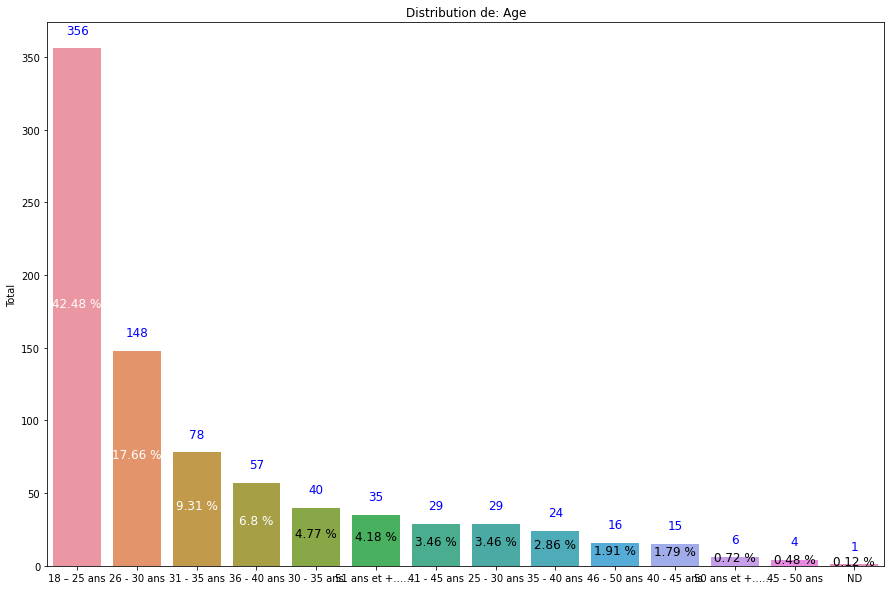

,Total,Percent
18 – 25 ans,356,42.482100
26 - 30 ans,148,17.661098
31 - 35 ans,78,9.307876
36 - 40 ans,57,6.801909
30 - 35 ans,40,4.773270
51 ans et +…….,35,4.176611
41 - 45 ans,29,3.460621
25 - 30 ans,29,3.460621
35 - 40 ans,24,2.863962
46 - 50 ans,16,1.909308


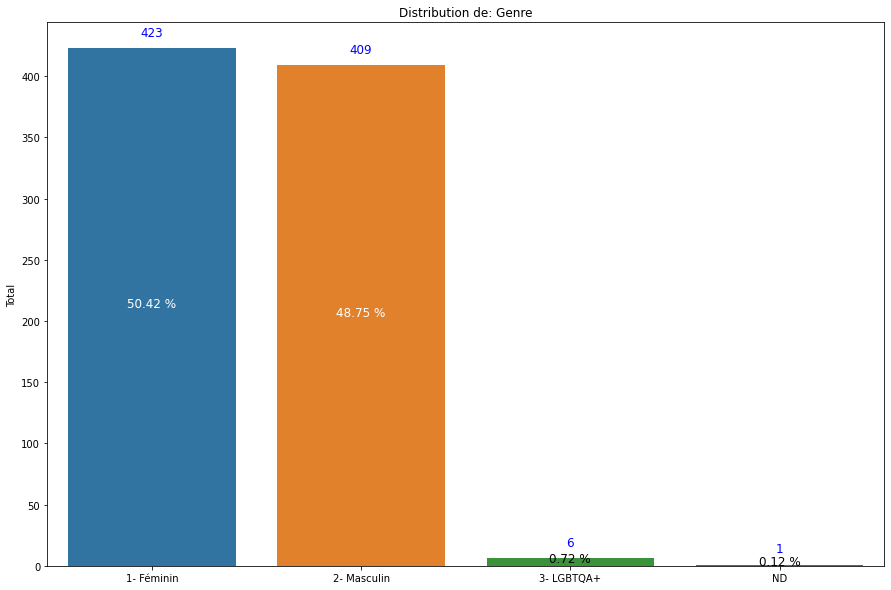

,Total,Percent
1- Féminin,423,50.417163
2- Masculin,409,48.748510
3- LGBTQA+,6,0.715137
ND,1,0.119190


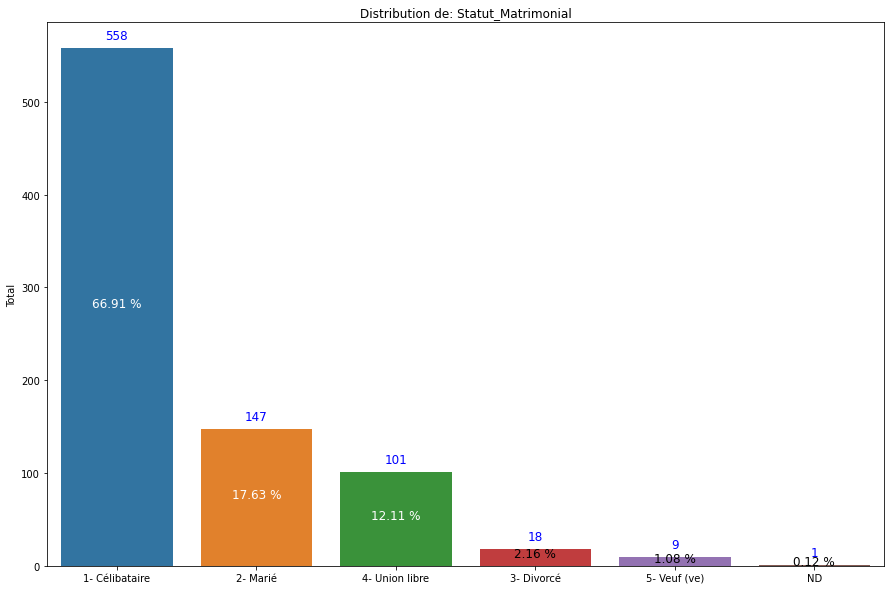

,Total,Percent
1- Célibataire,558,66.906475
2- Marié,147,17.625899
4- Union libre,101,12.110312
3- Divorcé,18,2.158273
5- Veuf (ve),9,1.079137
ND,1,0.119904


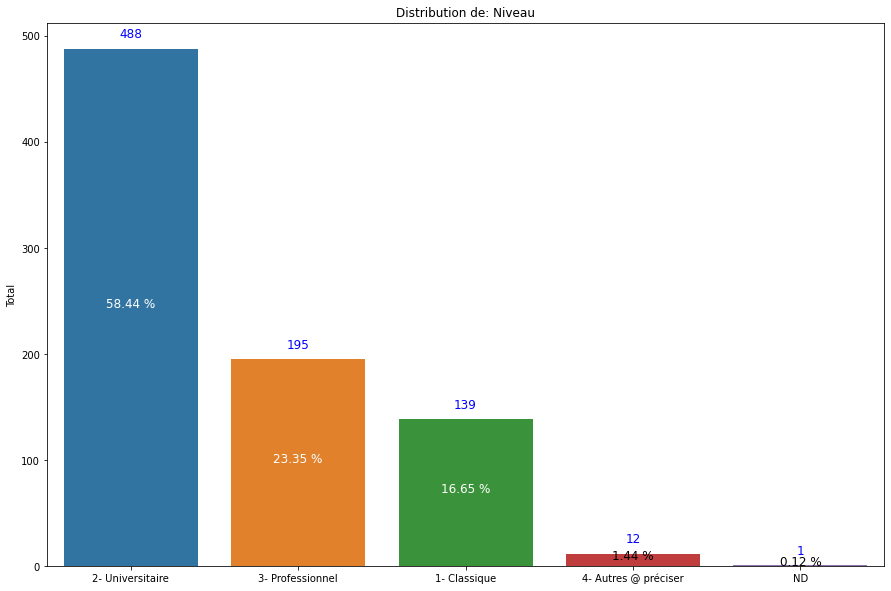

,Total,Percent
2- Universitaire,488,58.443114
3- Professionnel,195,23.353293
1- Classique,139,16.646707
4- Autres @ préciser,12,1.437126
ND,1,0.119760


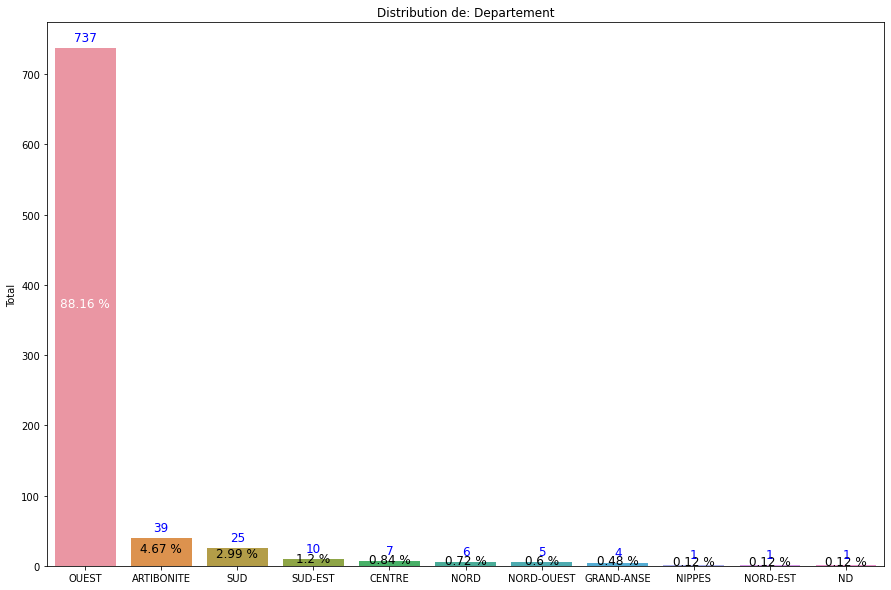

,Total,Percent
OUEST,737,88.157895
ARTIBONITE,39,4.665072
SUD,25,2.990431
SUD-EST,10,1.196172
CENTRE,7,0.837321
NORD,6,0.717703
NORD-OUEST,5,0.598086
GRAND-ANSE,4,0.478469
NIPPES,1,0.119617
NORD-EST,1,0.119617


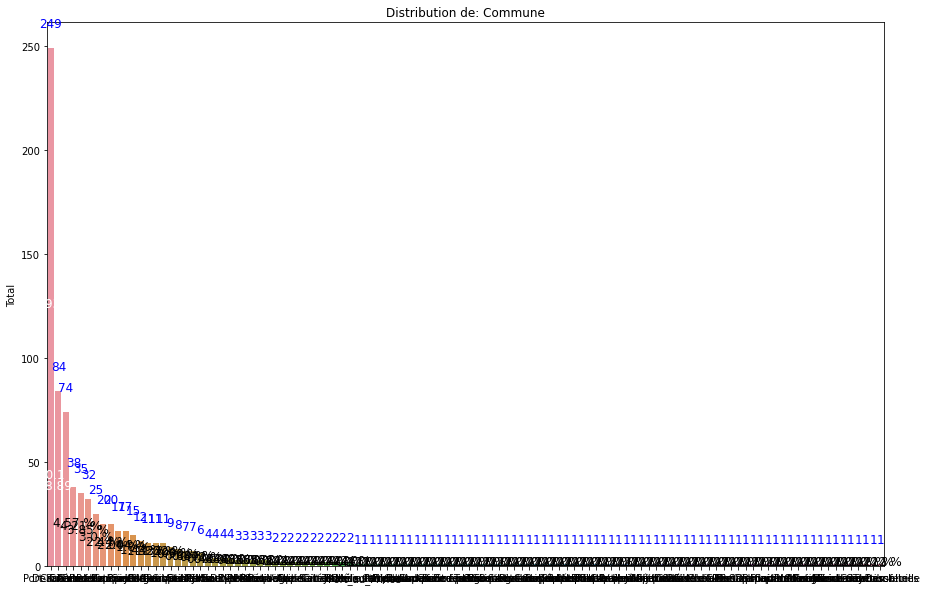

,Total,Percent
Delmas,249,29.927885
Port-au-Prince,84,10.096154
Tabarre,74,8.894231
Cité soleil,38,4.567308
Carrefour,35,4.206731
...,...,...
Petite riviere artibonite,1,0.120192
Caye,1,0.120192
Marchand Dessalines,1,0.120192
Torberck,1,0.120192


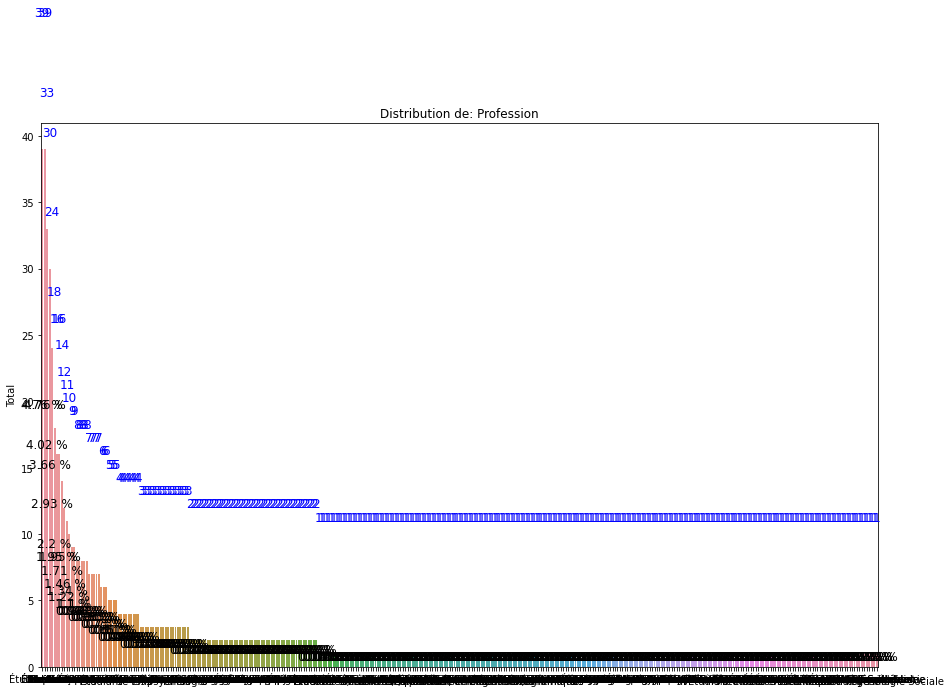

,Total,Percent
Étudiant,39,4.756098
Étudiante,39,4.756098
Comptable,33,4.024390
Etudiant,30,3.658537
Etudiante,24,2.926829
...,...,...
Étudiante en medecine,1,0.121951
Businesswoman,1,0.121951
Cité soleil,1,0.121951
Business woman,1,0.121951


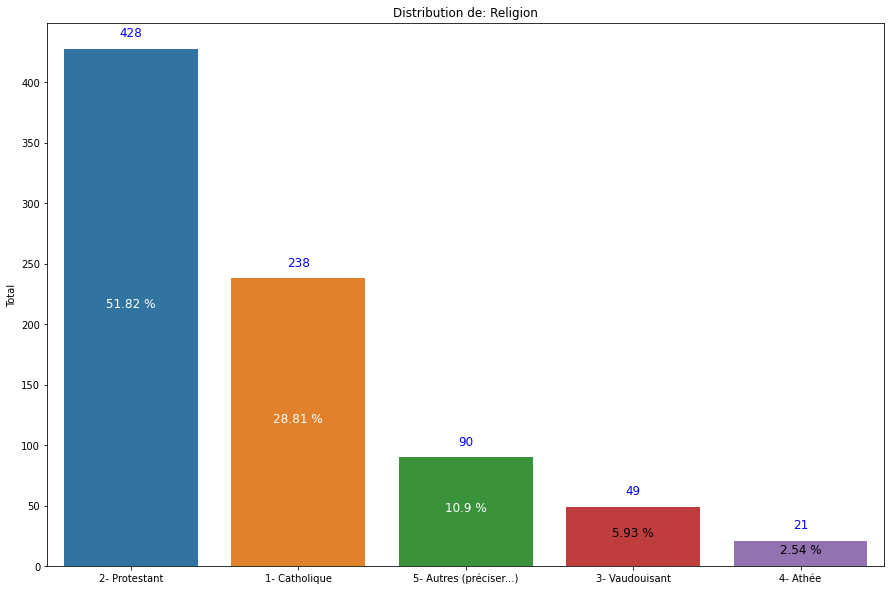

,Total,Percent
2- Protestant,428,51.815981
1- Catholique,238,28.813559
5- Autres (préciser...),90,10.895884
3- Vaudouisant,49,5.932203
4- Athée,21,2.542373


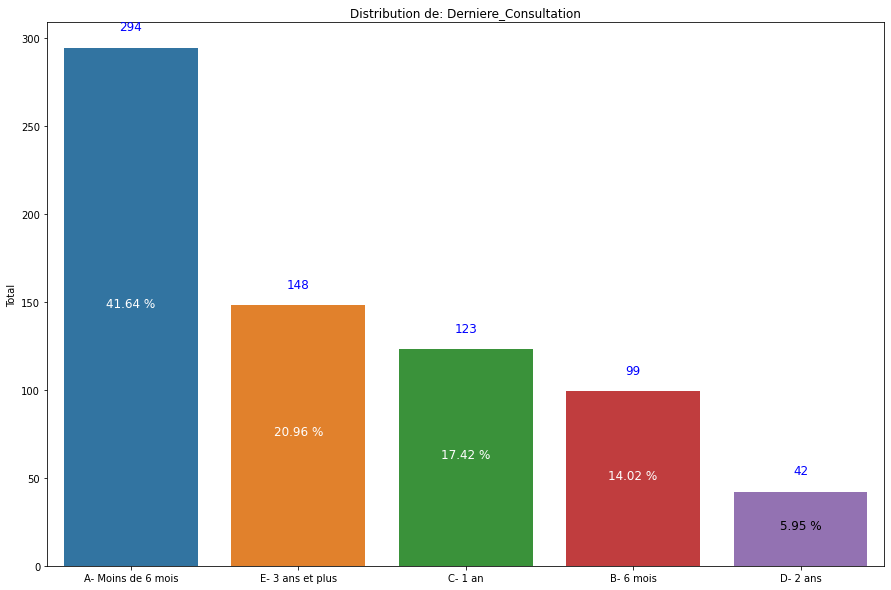

,Total,Percent
A- Moins de 6 mois,294,41.643059
E- 3 ans et plus,148,20.963173
C- 1 an,123,17.422096
B- 6 mois,99,14.022663
D- 2 ans,42,5.949008


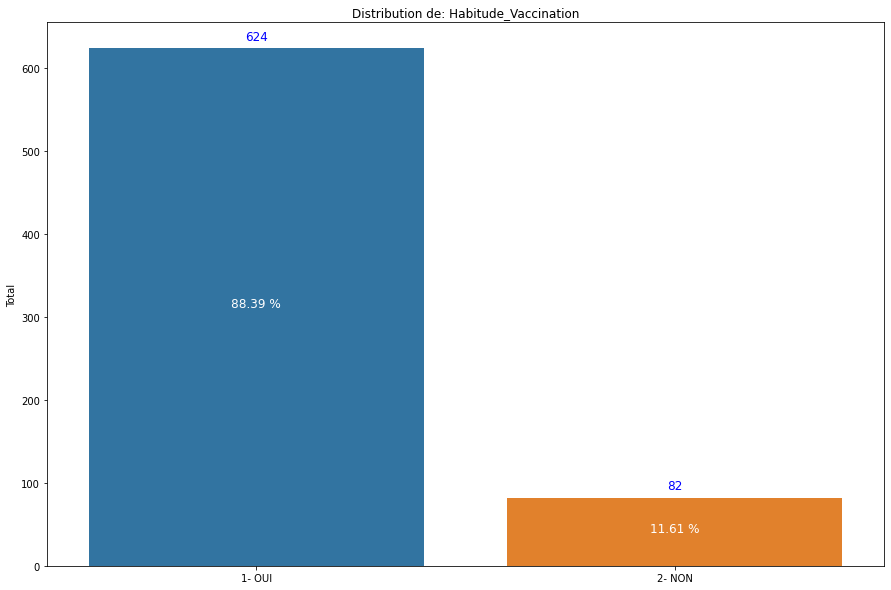

,Total,Percent
1- OUI,624,88.385269
2- NON,82,11.614731


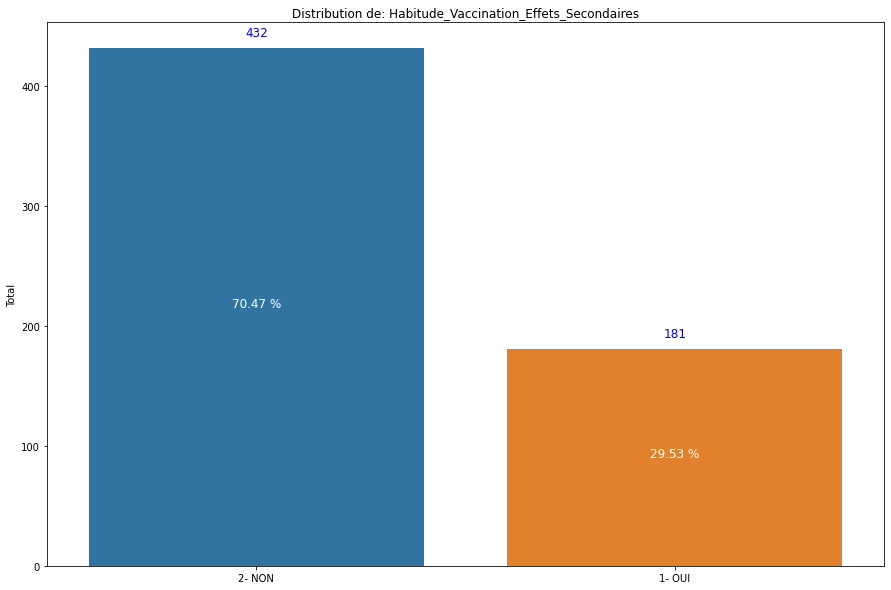

,Total,Percent
2- NON,432,70.473083
1- OUI,181,29.526917


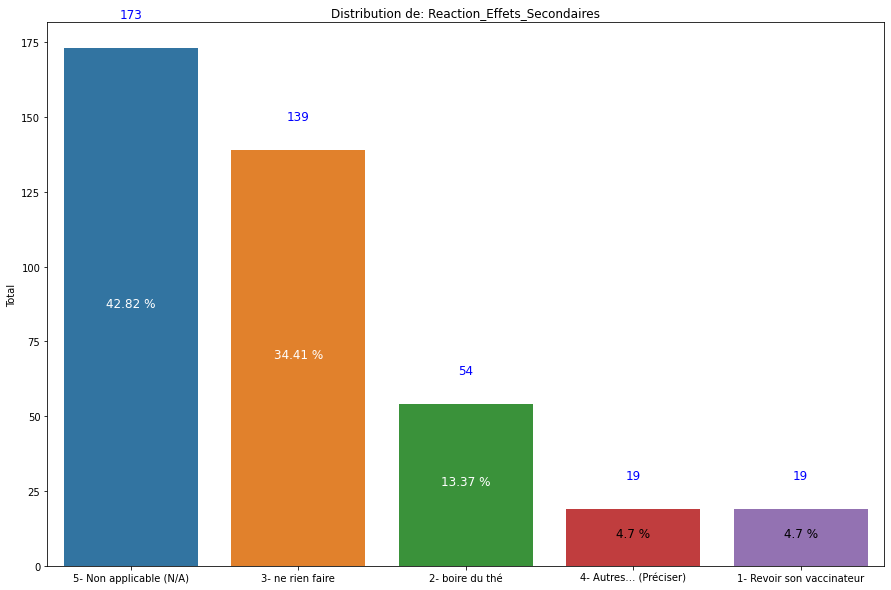

,Total,Percent
5- Non applicable (N/A),173,42.821782
3- ne rien faire,139,34.405941
2- boire du thé,54,13.366337
4- Autres… (Préciser),19,4.702970
1- Revoir son vaccinateur,19,4.702970


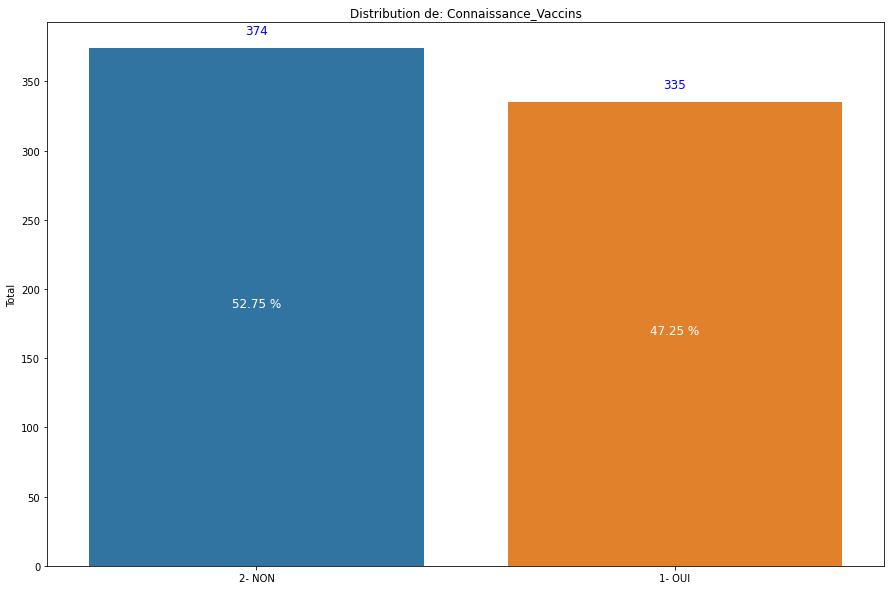

,Total,Percent
2- NON,374,52.750353
1- OUI,335,47.249647


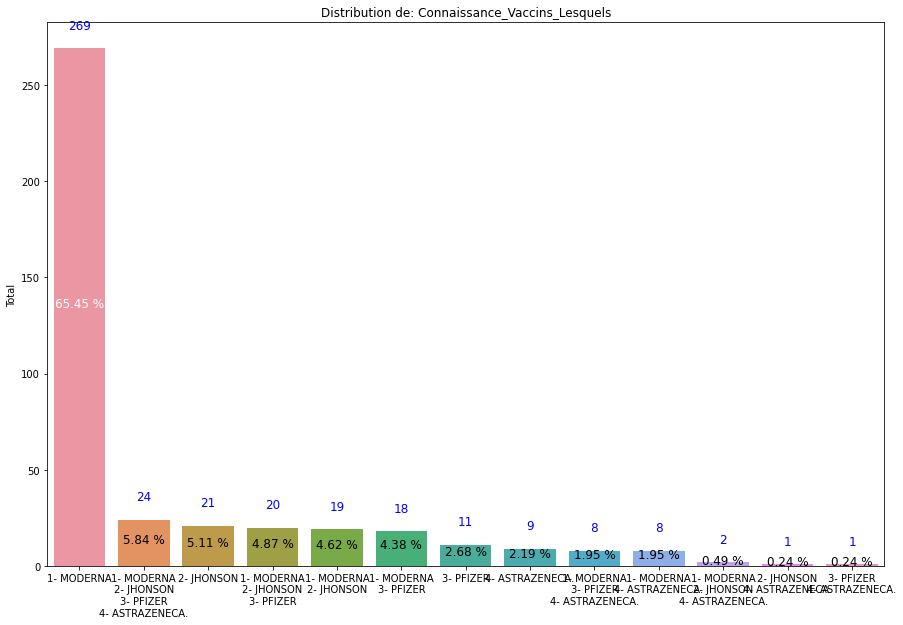

,Total,Percent
1- MODERNA,269,65.450122
1- MODERNA\n2- JHONSON\n3- PFIZER\n4- ASTRAZENECA.,24,5.839416
2- JHONSON,21,5.109489
1- MODERNA\n2- JHONSON\n3- PFIZER,20,4.866180
1- MODERNA\n2- JHONSON,19,4.622871
1- MODERNA\n3- PFIZER,18,4.379562
3- PFIZER,11,2.676399
4- ASTRAZENECA.,9,2.189781
1- MODERNA\n3- PFIZER\n4- ASTRAZENECA.,8,1.946472
1- MODERNA\n4- ASTRAZENECA.,8,1.946472


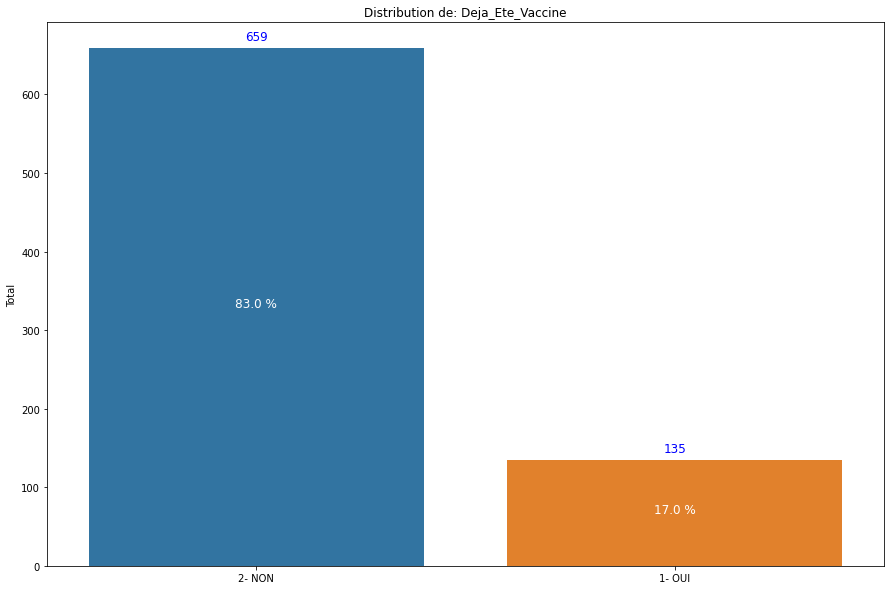

,Total,Percent
2- NON,659,82.997481
1- OUI,135,17.002519


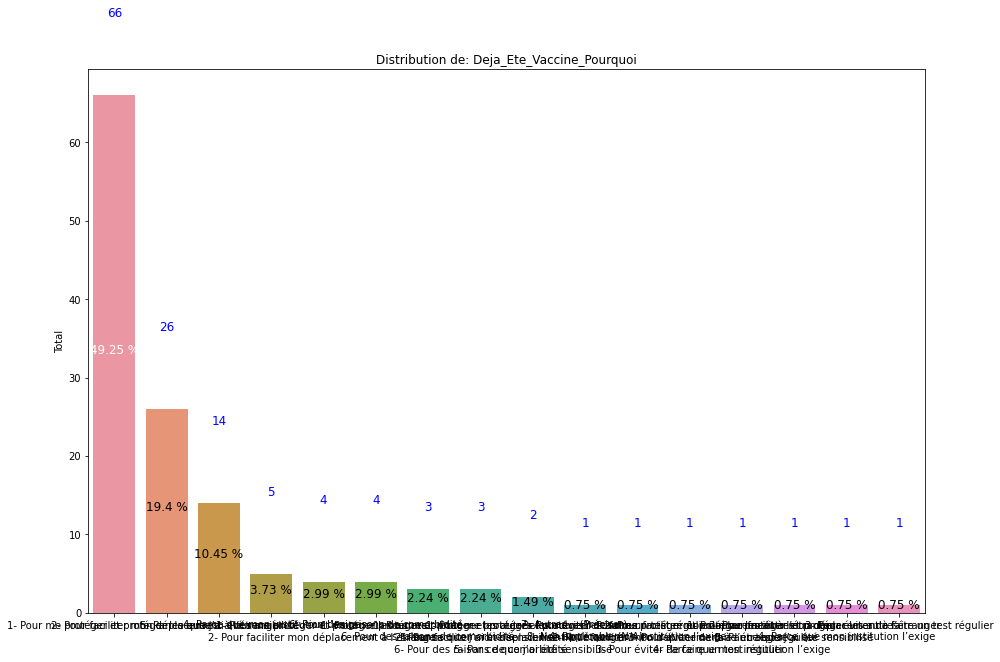

,Total,Percent
1- Pour me protéger et protéger les autres.,66,49.253731
2- Pour faciliter mon déplacement à l’étranger,26,19.402985
5- Par ce que j’ai été sensibilisé,14,10.447761
4- Parce que mon institution l’exige,5,3.731343
1- Pour me protéger et protéger les autres.\n2- Pour faciliter mon déplacement à l’étranger,4,2.985075
6- Pour des raisons de comorbidité,4,2.985075
1- Pour me protéger et protéger les autres.\n6- Pour des raisons de comorbidité,3,2.238806
1- Pour me protéger et protéger les autres.\n5- Par ce que j’ai été sensibilisé \n6- Pour des raisons de comorbidité,3,2.238806
1- Pour me protéger et protéger les autres.\n2- Pour faciliter mon déplacement à l’étranger \n5- Par ce que j’ai été sensibilisé,2,1.492537
7- Autres… (Préciser) \n8- Non applicable (N/A),1,0.746269


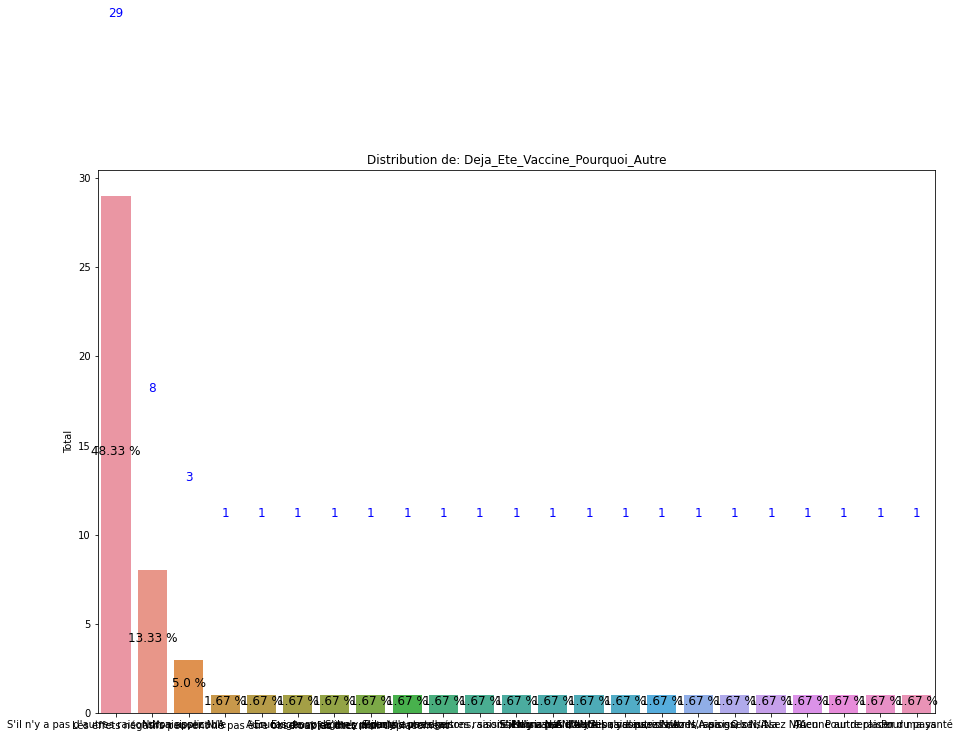

,Total,Percent
"S'il n'y a pas d'autres raisons, saisissez N/A",29,48.333333
Non,8,13.333333
Non applicable,3,5.000000
Les effets négatifs peuvent ne pas être observables chez moi,1,1.666667
Aucun,1,1.666667
En cas de voyage,1,1.666667
Exigency de mes parents,1,1.666667
Pour faciliter mon déplacement,1,1.666667
Pour me proteger,1,1.666667
"S'il n'y a pas d'autres raisons, saisisseNonz N/A",1,1.666667


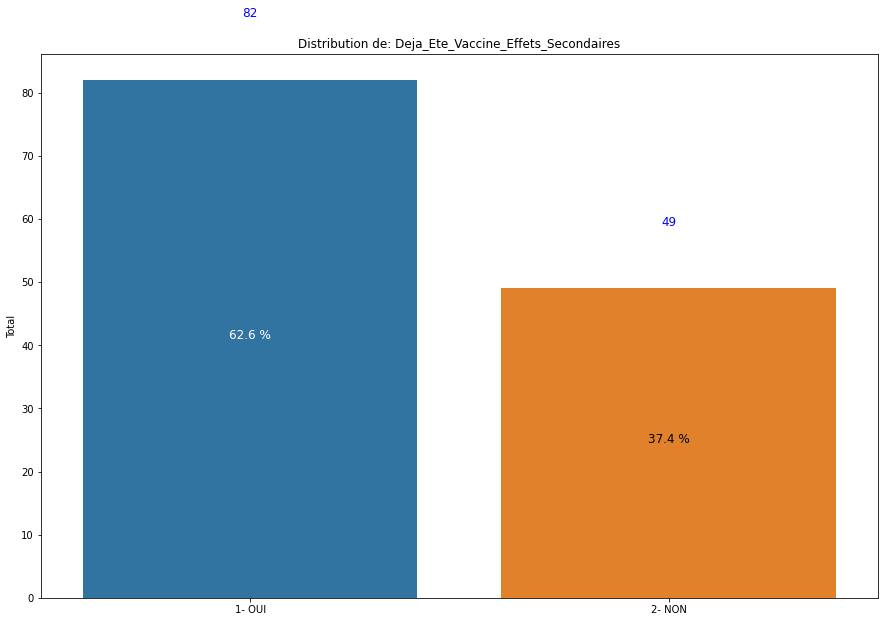

,Total,Percent
1- OUI,82,62.59542
2- NON,49,37.40458


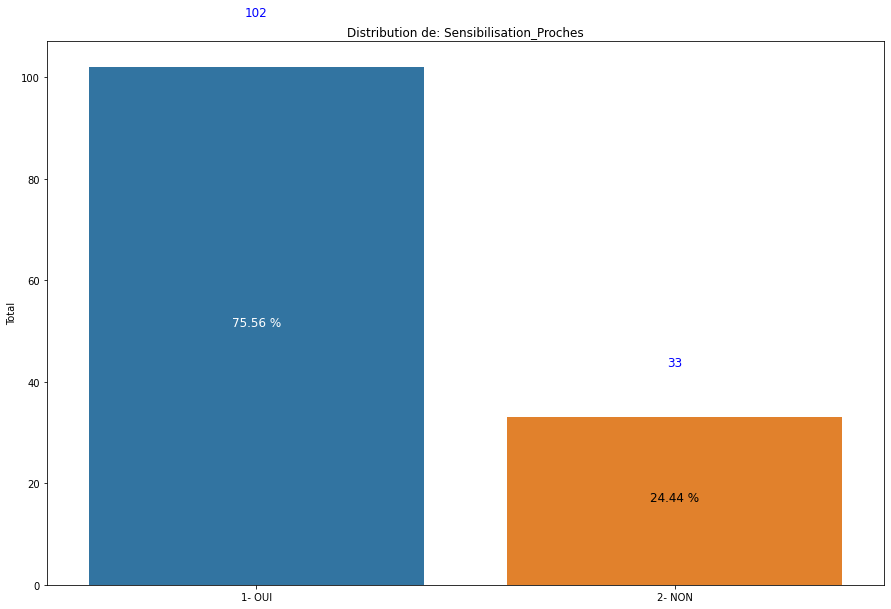

,Total,Percent
1- OUI,102,75.555556
2- NON,33,24.444444


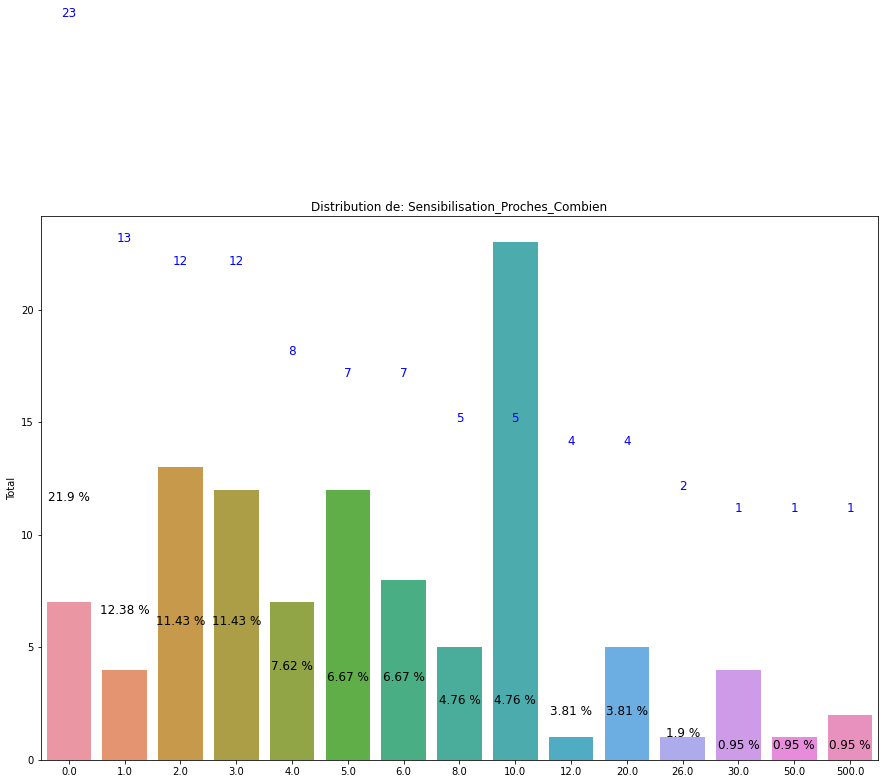

,Total,Percent
10.0,23,21.904762
2.0,13,12.380952
3.0,12,11.428571
5.0,12,11.428571
6.0,8,7.619048
0.0,7,6.666667
4.0,7,6.666667
20.0,5,4.761905
8.0,5,4.761905
1.0,4,3.809524


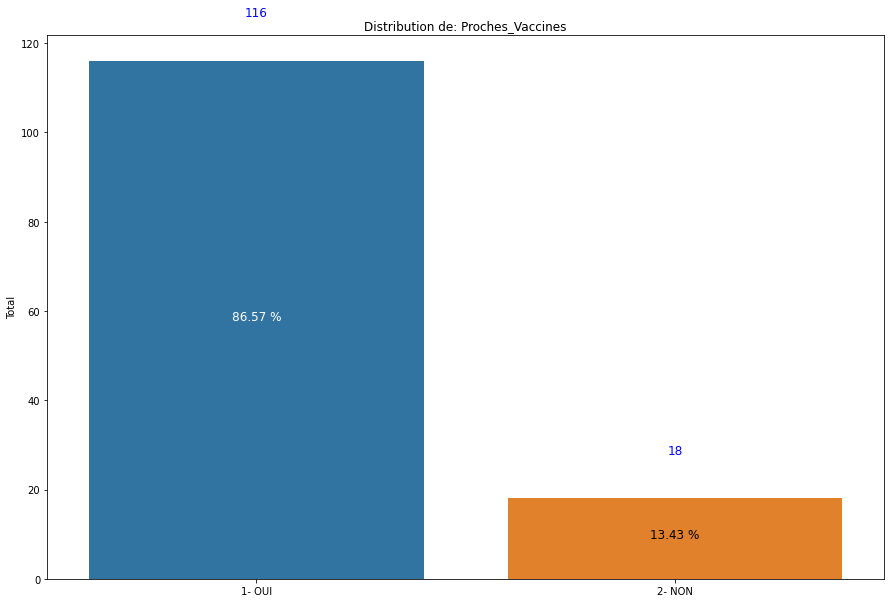

,Total,Percent
1- OUI,116,86.567164
2- NON,18,13.432836


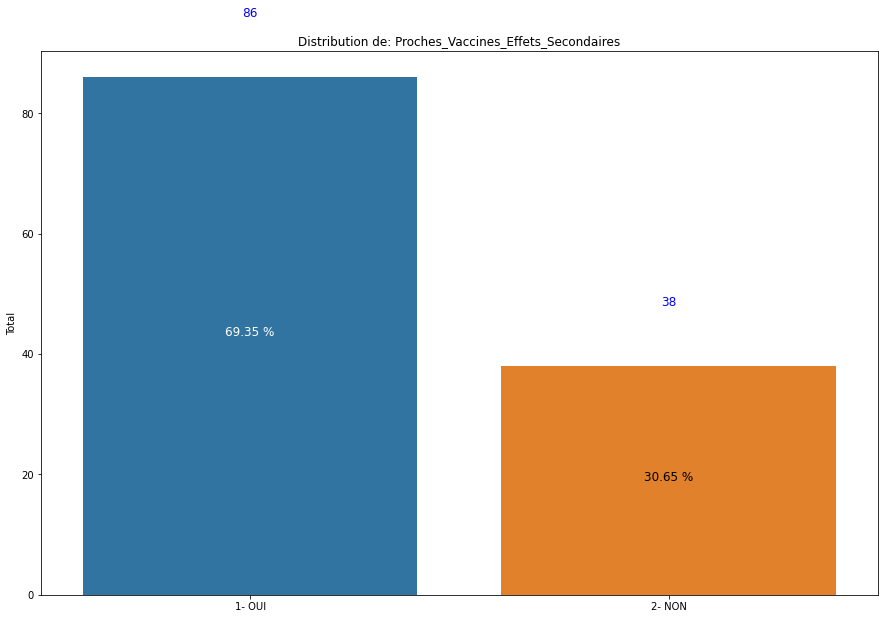

,Total,Percent
1- OUI,86,69.354839
2- NON,38,30.645161


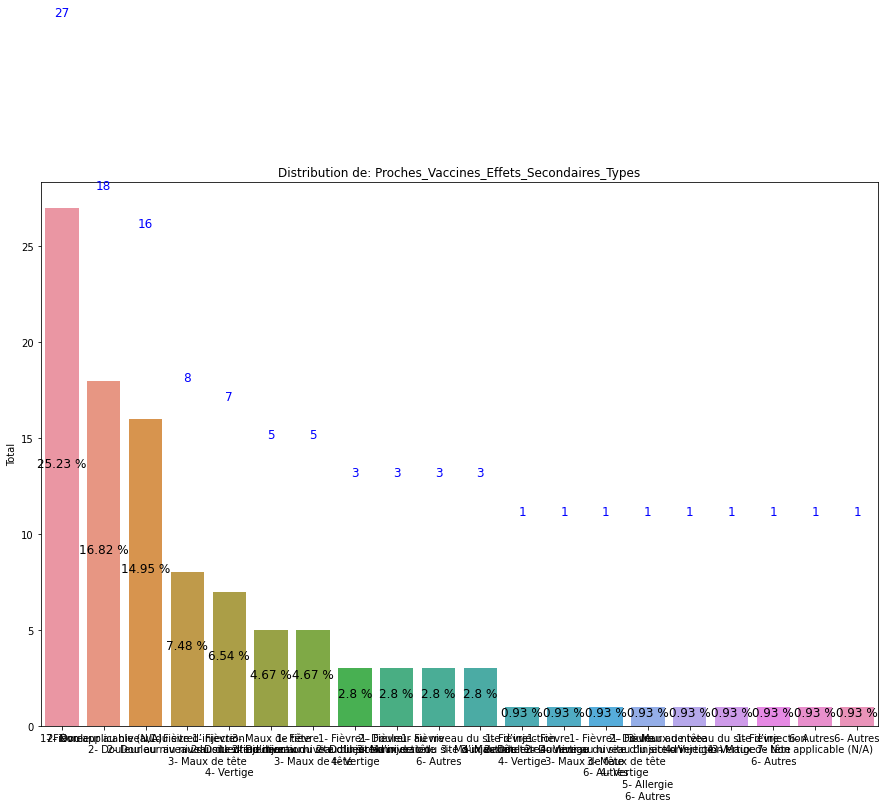

,Total,Percent
1- Fièvre,27,25.233645
7- Non applicable (N/A),18,16.822430
2- Douleur au niveau du site d’injection,16,14.953271
1- Fièvre \n2- Douleur au niveau du site d’injection,8,7.476636
1- Fièvre \n2- Douleur au niveau du site d’injection \n3- Maux de tête \n4- Vertige,7,6.542056
3- Maux de tête,5,4.672897
1- Fièvre \n2- Douleur au niveau du site d’injection \n3- Maux de tête,5,4.672897
1- Fièvre \n2- Douleur au niveau du site d’injection \n4- Vertige,3,2.803738
1- Fièvre \n3- Maux de tête,3,2.803738
1- Fièvre \n2- Douleur au niveau du site d’injection \n6- Autres,3,2.803738


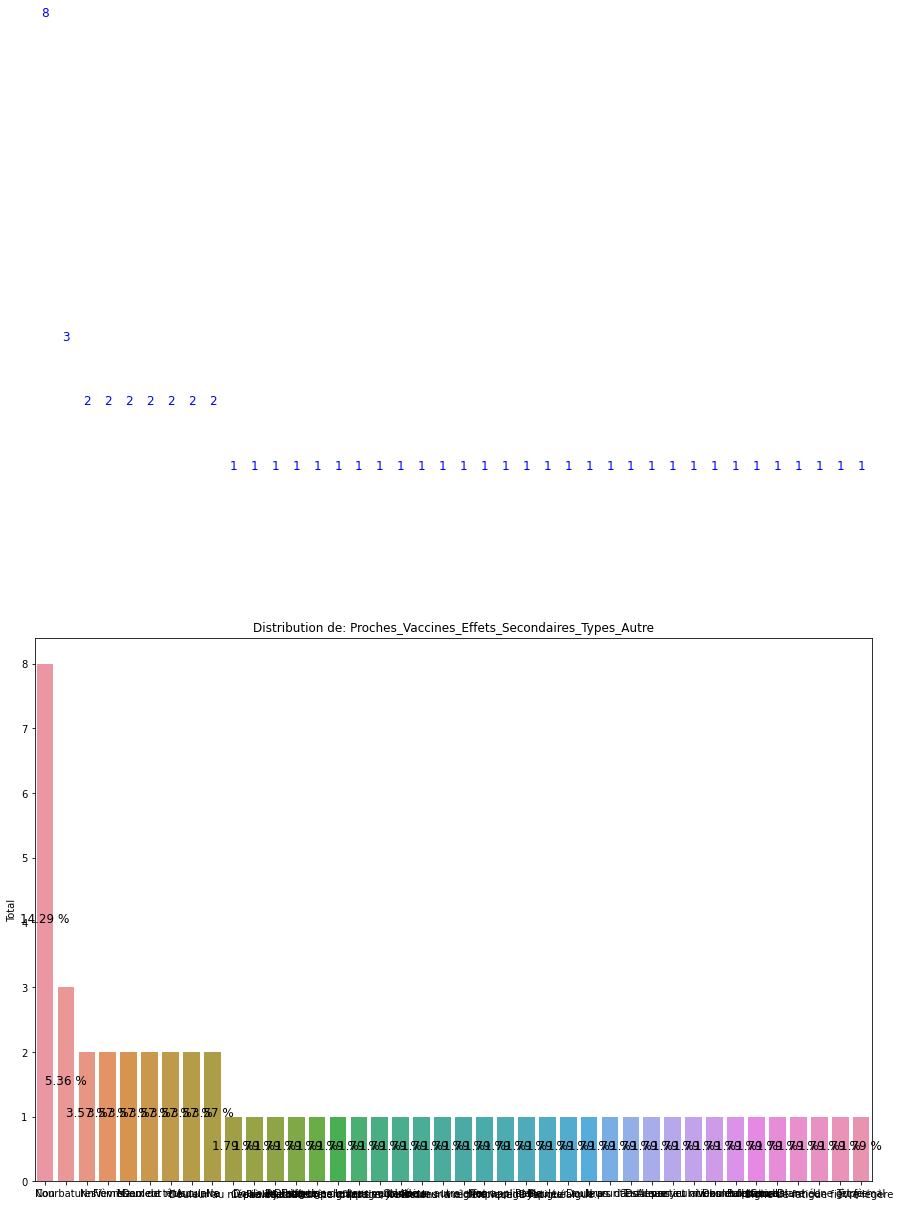

,Total,Percent
Non,8,14.285714
Courbatures,3,5.357143
Nn,2,3.571429
Fièvre,2,3.571429
Vomissement,2,3.571429
Maux de tête,2,3.571429
Douleur musculaire,2,3.571429
Aucun,2,3.571429
Na,2,3.571429
Douleur au niveau injecté,1,1.785714


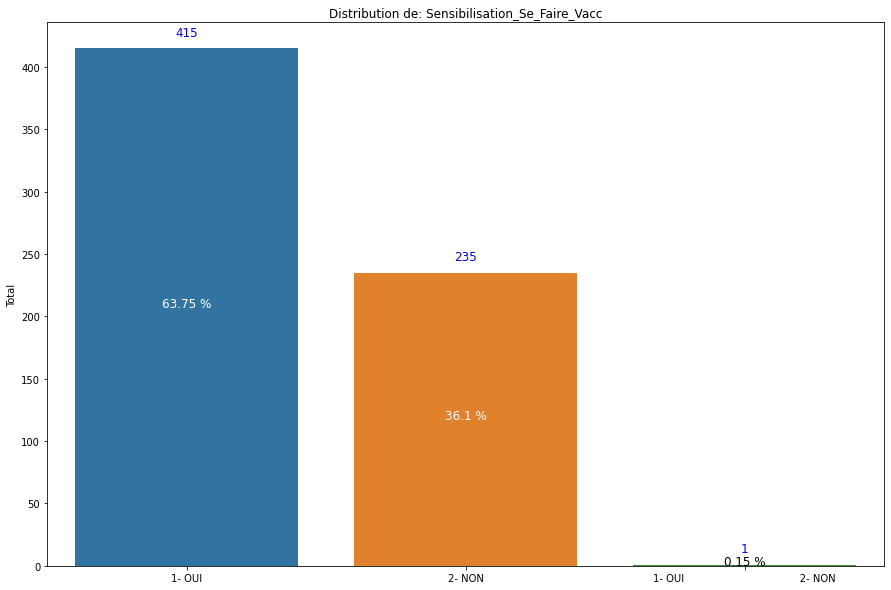

,Total,Percent
1- OUI,415,63.74808
2- NON,235,36.09831
1- OUI 2- NON,1,0.15361


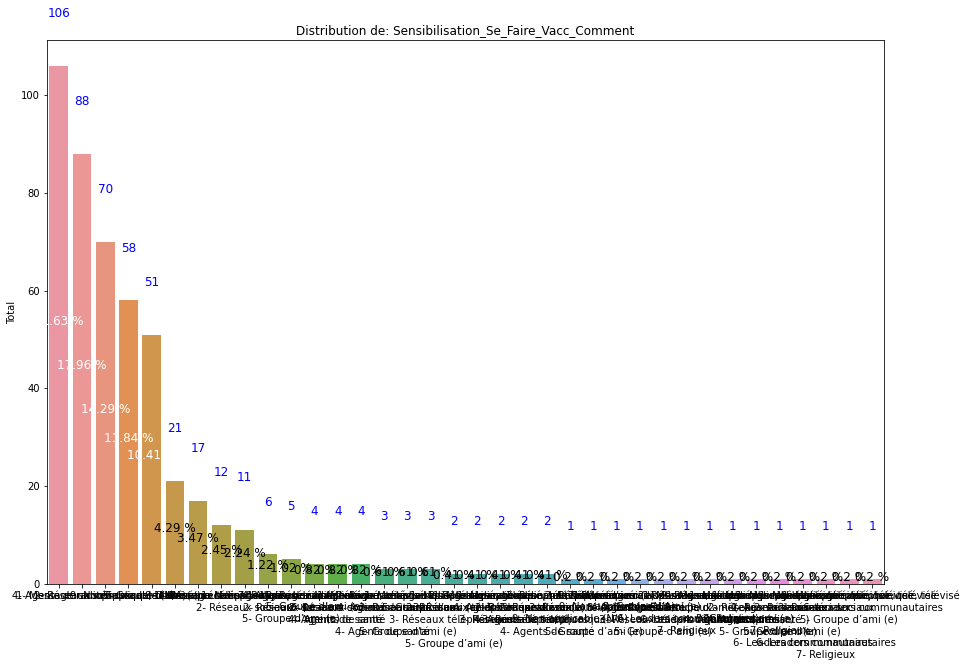

,Total,Percent
4- Agents de santé,106,21.632653
2- Réseaux sociaux,88,17.959184
"1- Message radiophonique, télévisé",70,14.285714
9- Non applicable (N/A),58,11.836735
5- Groupe d’ami (e),51,10.408163
6- Leaders communautaires,21,4.285714
8- Autres (préciser…),17,3.469388
3- Réseaux téléphoniques,12,2.448980
"1- Message radiophonique, télévisé \n2- Réseaux sociaux",11,2.244898
7- Religieux,6,1.224490


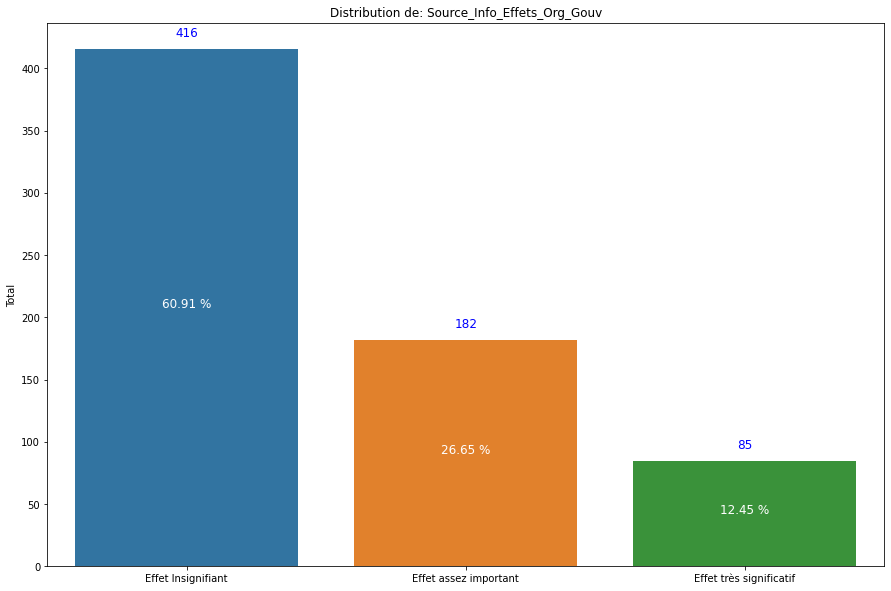

,Total,Percent
Effet Insignifiant,416,60.907760
Effet assez important,182,26.647145
Effet très significatif,85,12.445095


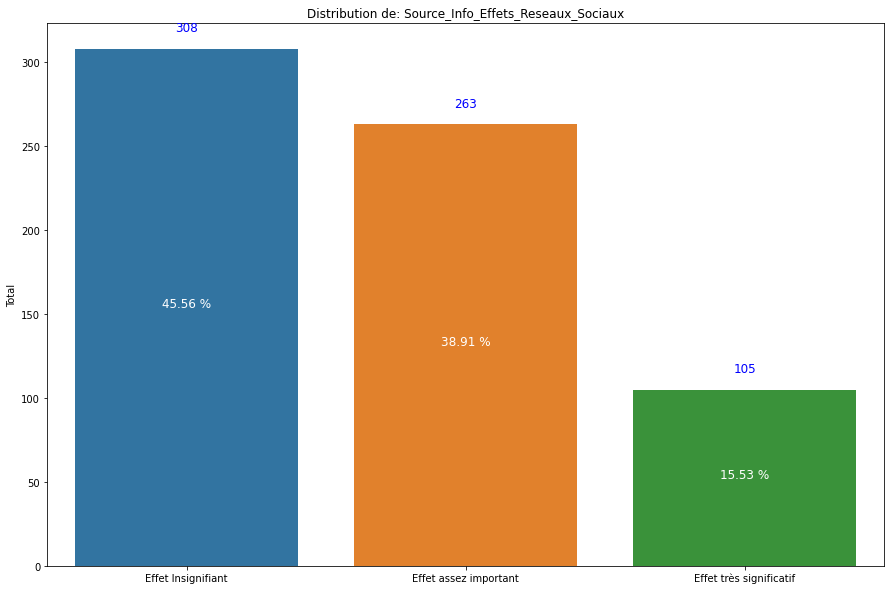

,Total,Percent
Effet Insignifiant,308,45.562130
Effet assez important,263,38.905325
Effet très significatif,105,15.532544


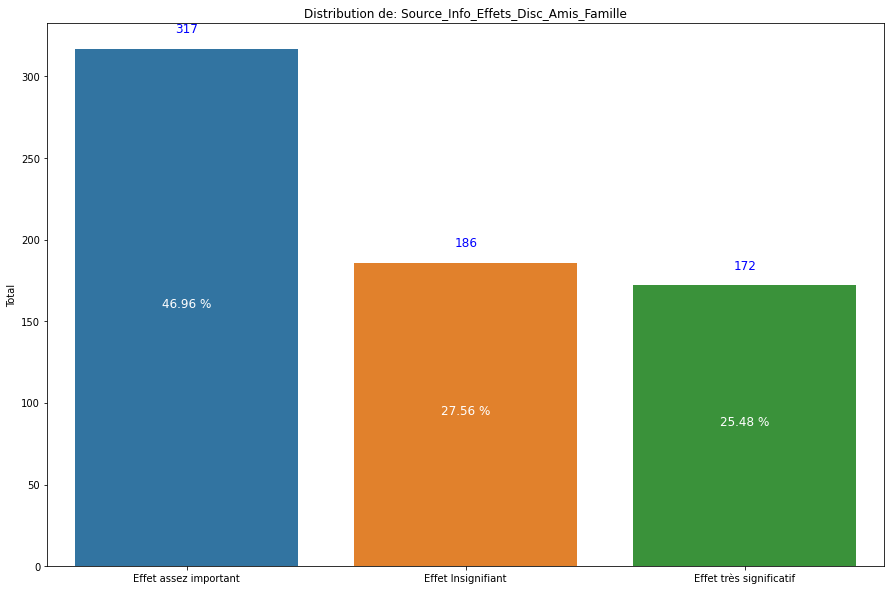

,Total,Percent
Effet assez important,317,46.962963
Effet Insignifiant,186,27.555556
Effet très significatif,172,25.481481


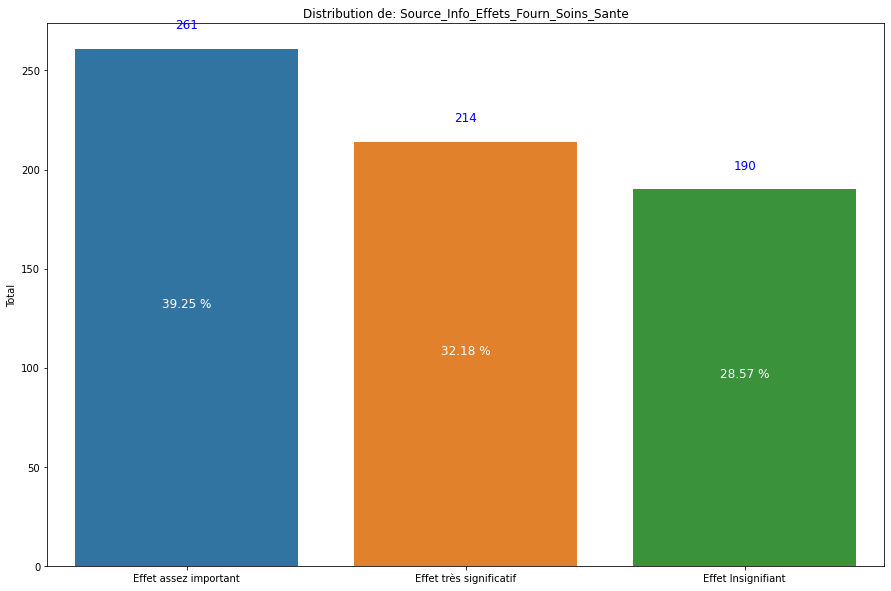

,Total,Percent
Effet assez important,261,39.248120
Effet très significatif,214,32.180451
Effet Insignifiant,190,28.571429


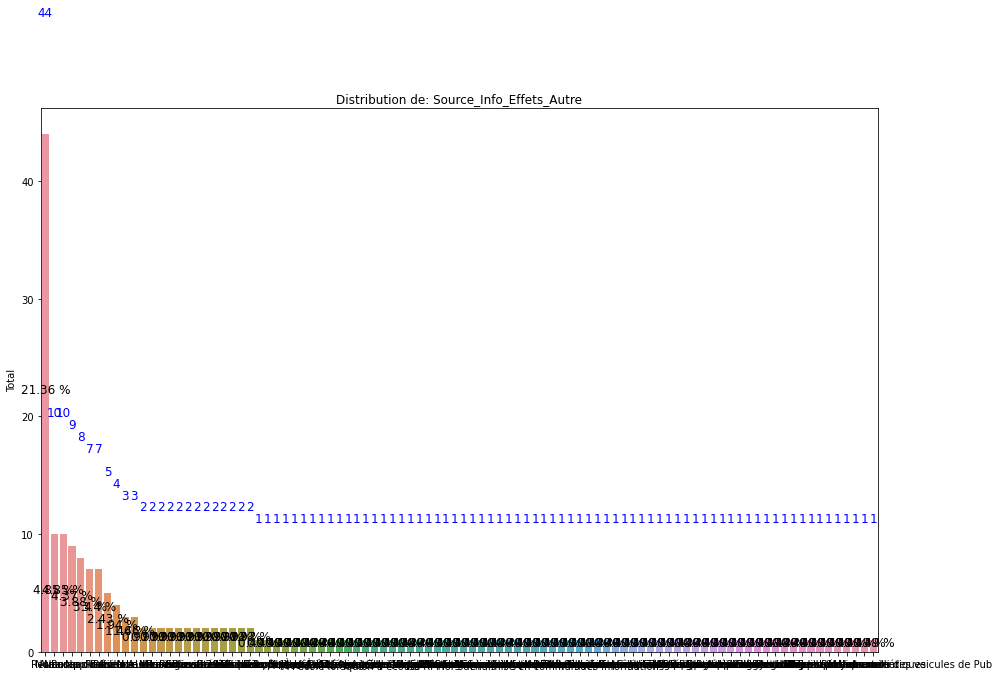

,Total,Percent
Non,44,21.359223
Aucun,10,4.854369
Reseax socio,10,4.854369
Na,9,4.368932
Non applicable,8,3.883495
...,...,...
Mw poko konprann li,1,0.485437
Nin,1,0.485437
Mon travail,1,0.485437
Une amoe,1,0.485437


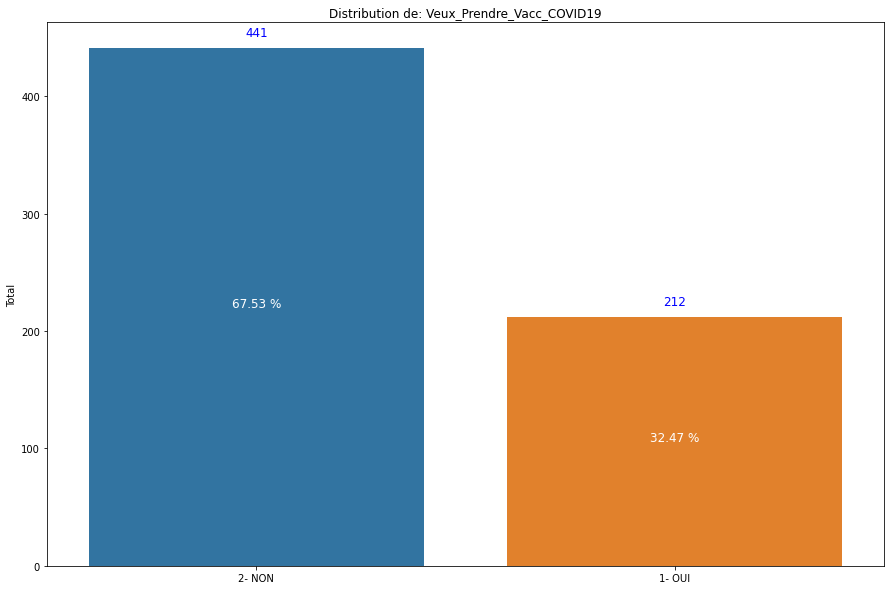

,Total,Percent
2- NON,441,67.534456
1- OUI,212,32.465544


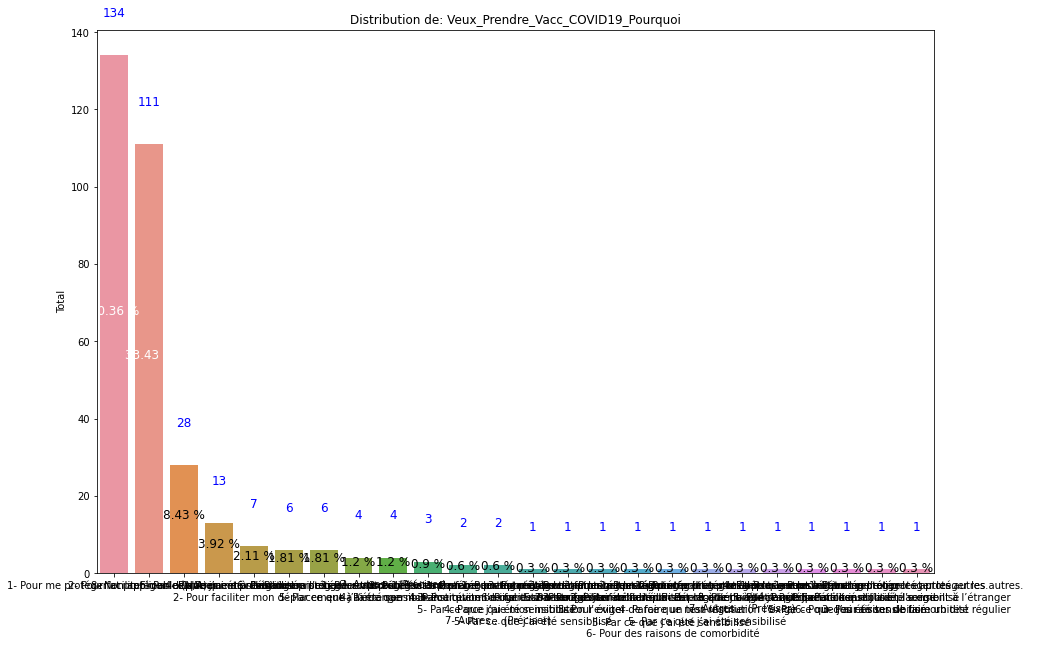

,Total,Percent
1- Pour me protéger et protéger les autres.,134,40.361446
8- Non applicable (N/A),111,33.433735
2- Pour faciliter mon déplacement à l’étranger,28,8.433735
5- Par ce que j’ai été sensibilisé,13,3.915663
4- Parce que mon institution l’exige,7,2.108434
1- Pour me protéger et protéger les autres.\n2- Pour faciliter mon déplacement à l’étranger,6,1.807229
6- Pour des raisons de comorbidité,6,1.807229
1- Pour me protéger et protéger les autres.\n5- Par ce que j’ai été sensibilisé,4,1.204819
7- Autres… (Préciser),4,1.204819
1- Pour me protéger et protéger les autres.\n4- Parce que mon institution l’exige,3,0.903614


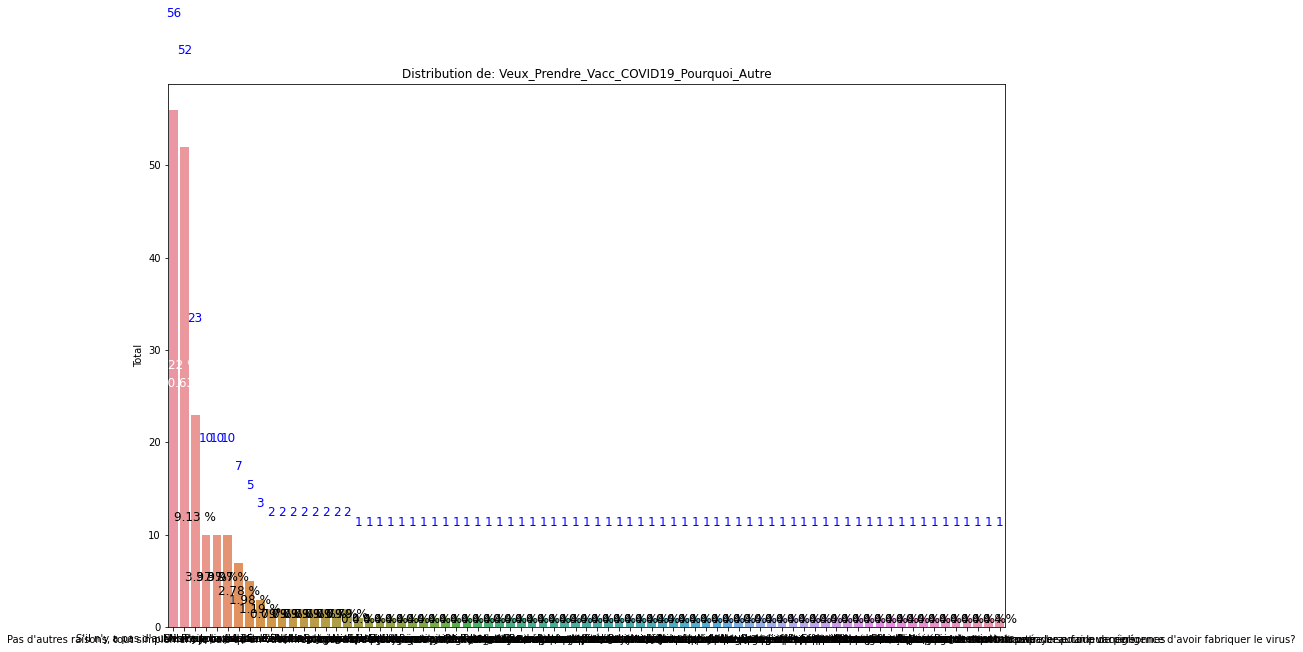

,Total,Percent
Non,56,22.222222
"S'il n'y a pas d'autres raisons, saisissez N/A",52,20.634921
Peur,23,9.126984
Non applicable,10,3.968254
Pour ma santé,10,3.968254
...,...,...
Pour proteger ma sante,1,0.396825
Pas de raison,1,0.396825
Je n'ai aucune confiance en ce soit disant vaccin. Pourquoi devrions-nous payer pour leur négligence d'avoir fabriquer le virus?,1,0.396825
Pour faire croire aux autre qui ont peur de se faire vacciné,1,0.396825


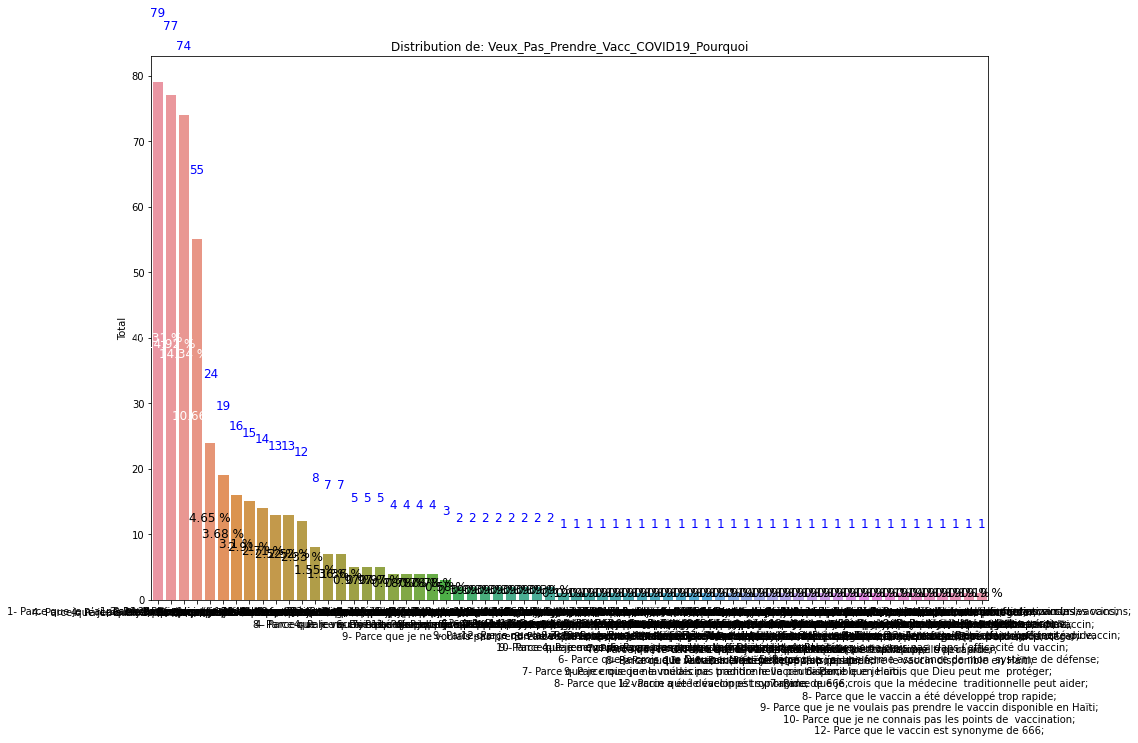

,Total,Percent
1- Parce que je n’ai pas assez d’information sur les vaccins ;,79,15.310078
4- Parce que je ne crois pas dans l’efficacité du vaccin ;,77,14.922481
14- Non applicable (N/A),74,14.341085
2- Parce que j’ai peur des vaccins ;,55,10.658915
4- Parce que je ne crois pas dans l’efficacité du vaccin;,24,4.651163
...,...,...
1- Parce que je n’ai pas assez d’information sur les vaccins;\n2- Parce que j’ai peur des vaccins;\n3- Parce que ma famille refuse de me faire vacciner;\n4- Parce que je ne crois pas dans l’efficacité du vaccin;\n5- Parce que j’ai une ferme assurance de mon système de défense;\n6- Parce que je crois que Dieu peut me protéger;\n7- Parce que je crois que la médecine traditionnelle peut aider;\n8- Parce que le vaccin a été développé trop rapide;\n9- Parce que je ne voulais pas prendre le vaccin disponible en Haïti;\n10- Parce que je ne connais pas les points de vaccination;\n12- Parce que le vaccin est synonyme de 666;,1,0.193798
2- Parce que j’ai peur des vaccins;\n8- Parce que le vaccin a été développé trop rapide;\n13- Autres….(Préciser),1,0.193798
2- Parce que j’ai peur des vaccins;\n4- Parce que je ne crois pas dans l’efficacité du vaccin;\n6- Parce que je crois que Dieu peut me protéger;,1,0.193798
1- Parce que je n’ai pas assez d’information sur les vaccins;\n2- Parce que j’ai peur des vaccins;\n8- Parce que le vaccin a été développé trop rapide;,1,0.193798


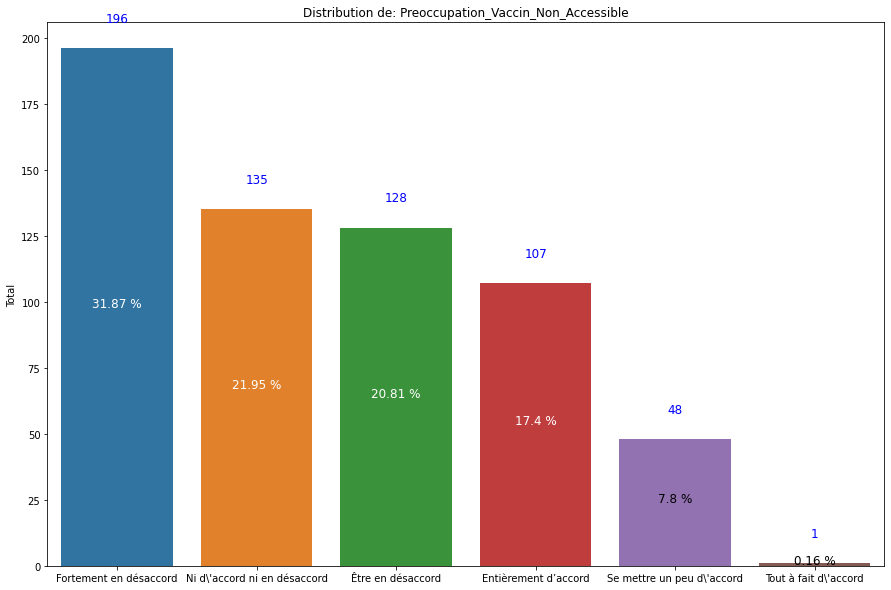

,Total,Percent
Fortement en désaccord,196,31.869919
Ni d\'accord ni en désaccord,135,21.951220
Être en désaccord,128,20.813008
Entièrement d’accord,107,17.398374
Se mettre un peu d\'accord,48,7.804878
Tout à fait d\'accord,1,0.162602


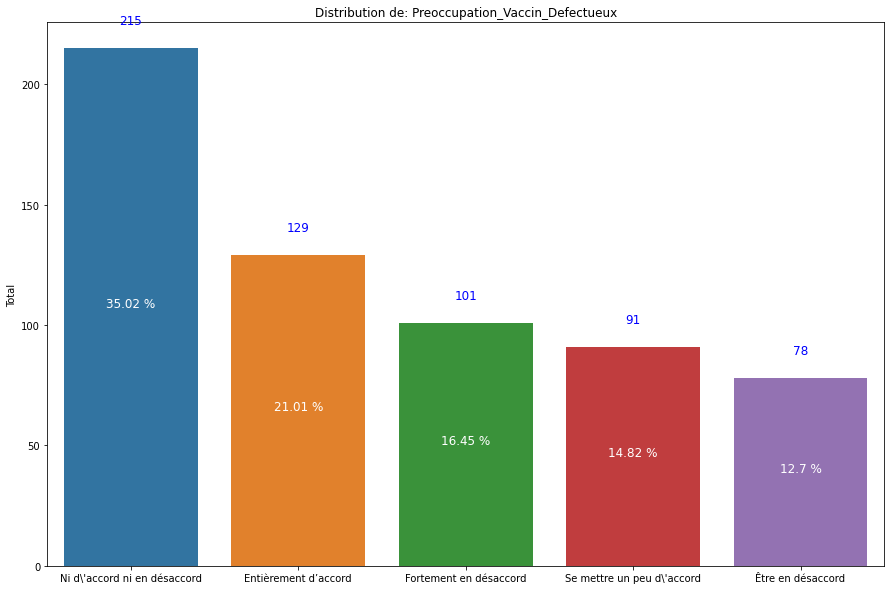

,Total,Percent
Ni d\'accord ni en désaccord,215,35.016287
Entièrement d’accord,129,21.009772
Fortement en désaccord,101,16.449511
Se mettre un peu d\'accord,91,14.820847
Être en désaccord,78,12.703583


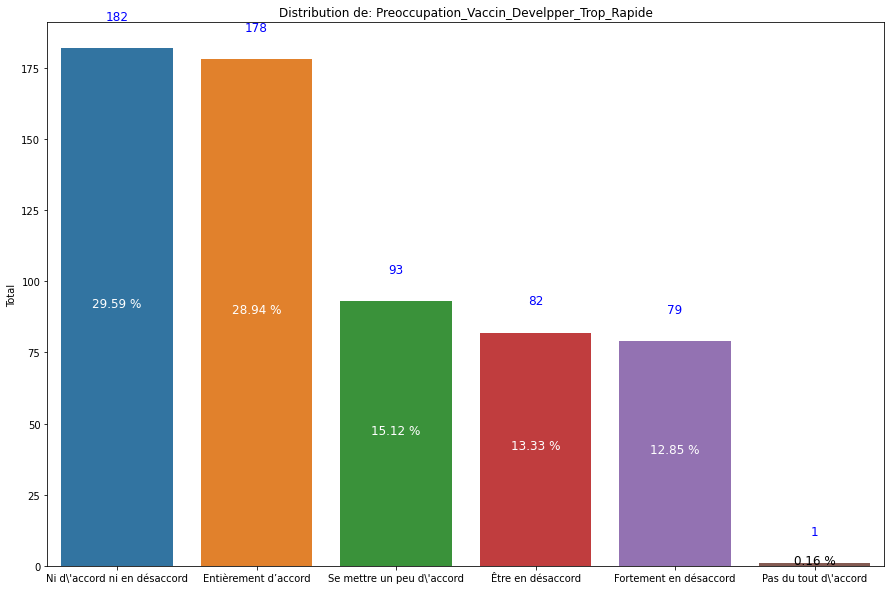

,Total,Percent
Ni d\'accord ni en désaccord,182,29.593496
Entièrement d’accord,178,28.943089
Se mettre un peu d\'accord,93,15.121951
Être en désaccord,82,13.333333
Fortement en désaccord,79,12.845528
Pas du tout d\'accord,1,0.162602


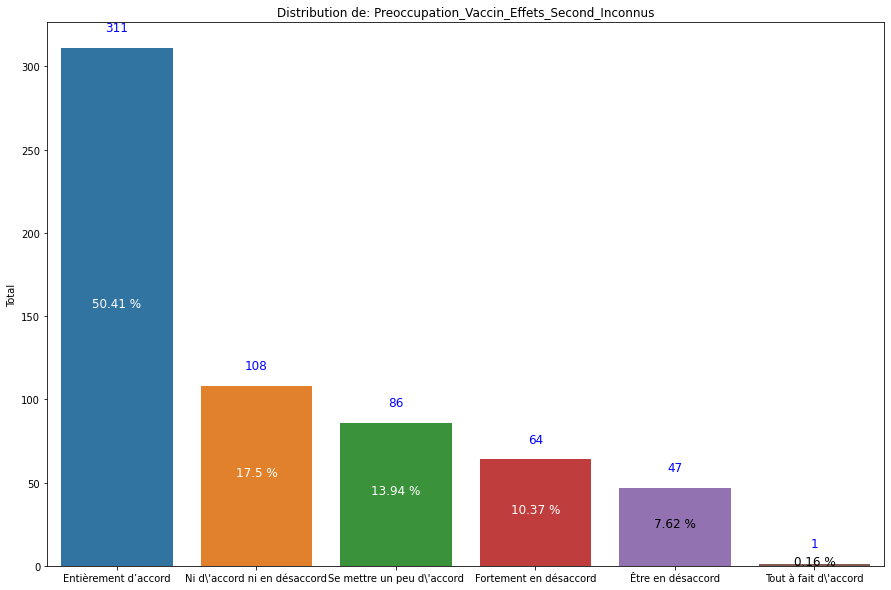

,Total,Percent
Entièrement d’accord,311,50.405186
Ni d\'accord ni en désaccord,108,17.504052
Se mettre un peu d\'accord,86,13.938412
Fortement en désaccord,64,10.372771
Être en désaccord,47,7.617504
Tout à fait d\'accord,1,0.162075


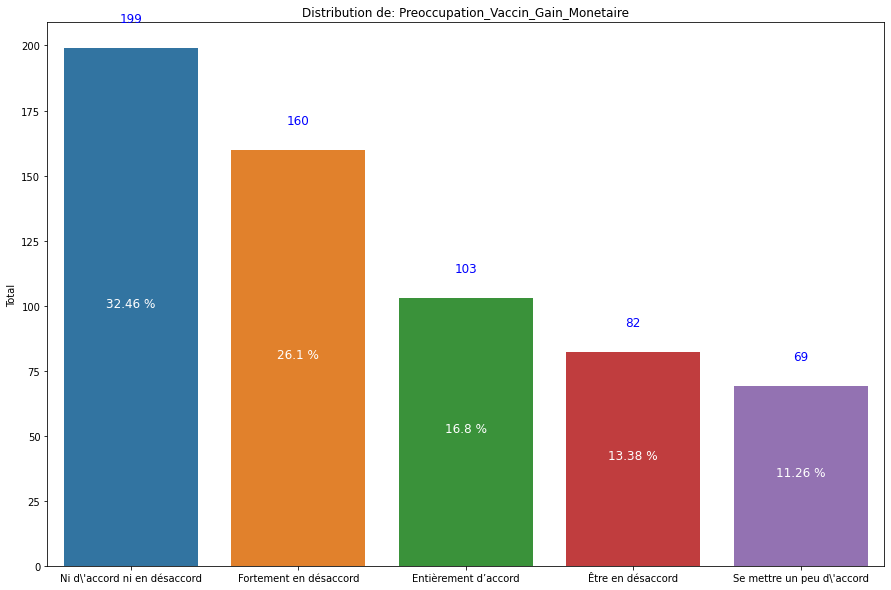

,Total,Percent
Ni d\'accord ni en désaccord,199,32.463295
Fortement en désaccord,160,26.101142
Entièrement d’accord,103,16.802610
Être en désaccord,82,13.376835
Se mettre un peu d\'accord,69,11.256117


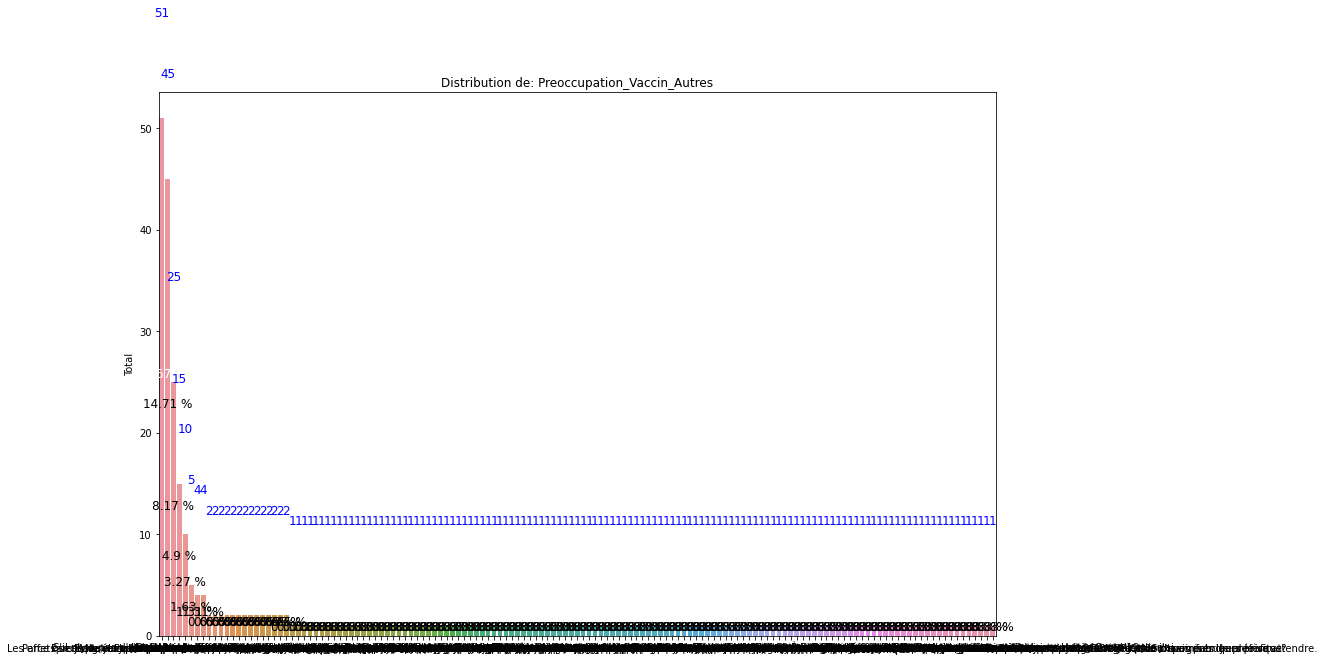

,Total,Percent
"S'il n'y a pas d'autres raisons, saisissez N/A",51,16.666667
Non,45,14.705882
Peur,25,8.169935
Raison personnel,15,4.901961
Aucune,10,3.267974
...,...,...
Je n'ai aucune confiance en ce soit disant vaccin. Pourquoi devrions-nous payer pour leur négligence d'avoir fabriquer le virus?,1,0.326797
"Personnellement, je veux suivre les effets à moyen terme. Trop de confusions, trop d'avis SCIENTIFIQUES divergents. Je préfère attendre.",1,0.326797
J'ai peur les effets secondaires,1,0.326797
Je suis asmatique,1,0.326797


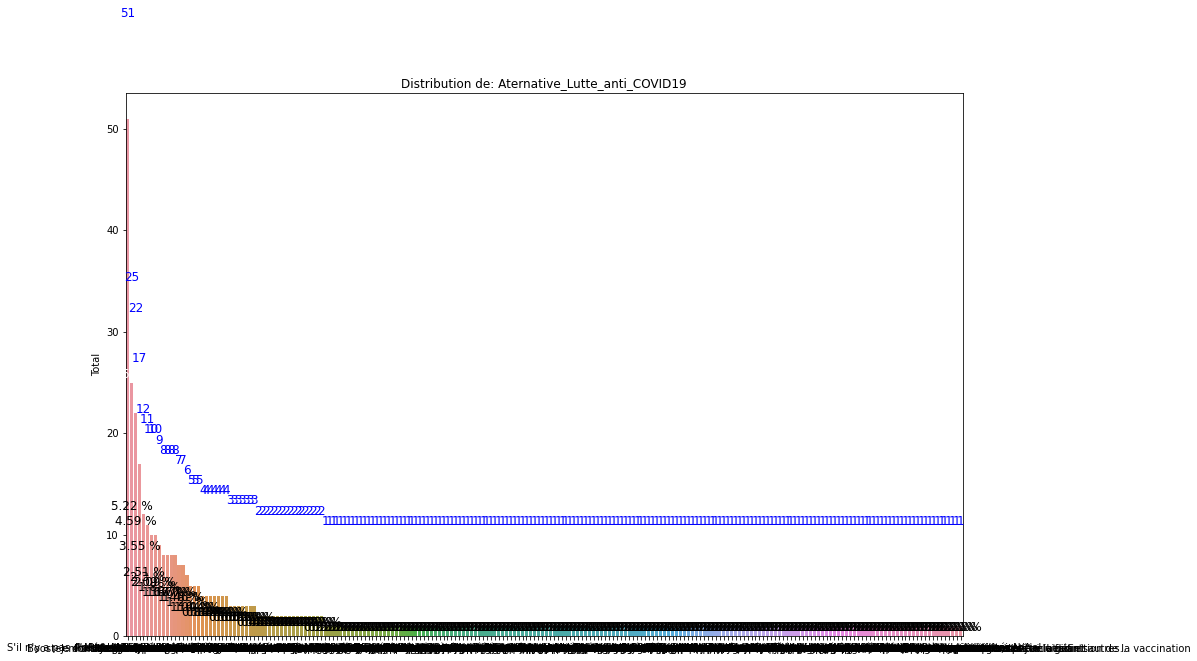

,Total,Percent
"S'il n'y a pas d'autres alternatives, saisissez N/A",51,10.647182
Non,25,5.219207
Prendre des precautions,22,4.592902
Les gestes barrière,17,3.549061
Médecine traditionnelle,12,2.505219
...,...,...
Stérilisez les outils utilisés,1,0.208768
Remède naturel,1,0.208768
Les gestes barrière et ne pas sortir sans un besoin,1,0.208768
"Porter un masque, distance social",1,0.208768


In [86]:
for cat_col in categorical_variables:
  result = univariate_analysis(df, col=cat_col, abs_value ="Total",rel_value ="Percent",show_plot=True,title=f"Distribution de: {cat_col}")
  display(result)

In [87]:
Commentaires = " ".join(i for i in df.Commentaires)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(Commentaires)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

TypeError: sequence item 1: expected str instance, float found